# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

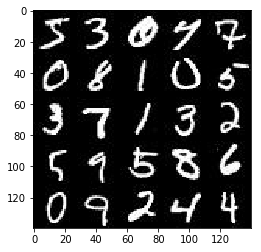

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')


### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

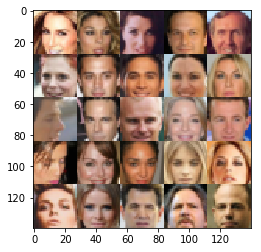

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1


C:\Users\Bahareh\Anaconda3\envs\dog\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), "input_real")
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), "input_z")
    learning_rate = tf.placeholder(tf.float32, name="lr")

    return real_inputs, z_inputs, learning_rate

   


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.1
    keep_prob = 0.9

    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', activation=None)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', activation=None)
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        
        flat = tf.reshape(x3, (-1,  4 * 4 * 256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits

    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    keep_prob = 0.9
    
    with tf.variable_scope('generator', reuse=not is_train):
        g1 = tf.layers.dense(z, 7*7*512)
        g1 = tf.reshape(g1, (-1, 7, 7, 512))
        g1 = tf.layers.batch_normalization(g1, training=is_train)
        g1 = tf.maximum(alpha * g1, g1)
        # shape = 7x7x512
        
        g2 = tf.layers.conv2d_transpose(g1, 256, 5, strides=2, padding='same', activation=None)
        g2 = tf.layers.batch_normalization(g2, training=is_train)
        g2 = tf.maximum(alpha * g2, g2)
        g2 = tf.nn.dropout(g2, keep_prob=keep_prob)
        # shape = 14x14x256
        
        g3 = tf.layers.conv2d_transpose(g2, 128, 5, strides=2, padding='same', activation=None)
        g3 = tf.layers.batch_normalization(g3, training=is_train)
        g3 = tf.maximum(alpha * g3, g3)   
        g3 = tf.nn.dropout(g3, keep_prob=keep_prob)
        # shape = 28x28x128
        
        logits = tf.layers.conv2d_transpose(g3, out_channel_dim, 3, strides=1, padding='same', activation=None)
        # shape = 28x28x5
        
        out = tf.tanh(logits)
        
        return out

    
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_output = generator(input_z, out_channel_dim)
    disc_output_real, disc_logits_real = discriminator(input_real)
    disc_output_fake, disc_logits_fake = discriminator(g_output, reuse=True)
    
    disc_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = disc_logits_real,
            labels = tf.ones_like(disc_output_real) * (1 - smooth)
        )
    )
    disc_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = disc_logits_fake,
            labels = tf.zeros_like(disc_output_fake)
        )
    )
    gen_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = disc_logits_fake,
            labels = tf.ones_like(disc_output_fake)
        )
    )
    
    disc_loss = disc_loss_real + disc_loss_fake
    return disc_loss, gen_loss

    
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train_vars = tf.trainable_variables()
    disc_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    gen_vars = [var for var in train_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    with tf.control_dependencies(update_ops):
        gen_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
        disc_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=disc_vars)

        return disc_train_opt, gen_train_opt

    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    disc_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    disc_opt, gen_opt = model_opt(disc_loss, gen_loss, lr, beta1)

    
    saver = tf.train.Saver()
    losses = []
    steps = 0
    total_steps = epoch_count * batch_size

    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(
                    disc_opt, 
                    feed_dict={
                        input_real: batch_images, input_z: batch_z, lr: learning_rate 
                    }
                )
                _ = sess.run(
                    gen_opt, 
                    feed_dict={
                        input_real: batch_images, 
                        input_z: batch_z, 
                        lr:learning_rate
                    }
                )
                if steps == 1:
                    print('initial output:')
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = disc_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = gen_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                            "Generator Loss: {:.4f}".format(train_loss_g),
                            "Discriminator Loss: {:.4f}...".format(train_loss_d))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    

        saver.save(sess, './generator.ckpt')
                
    return losses
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

initial output:


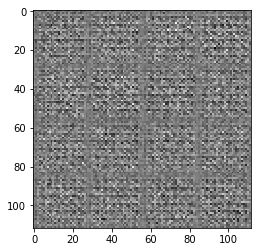

Epoch 1/2... Generator Loss: 2.7181 Discriminator Loss: 0.4490...
Epoch 1/2... Generator Loss: 4.7974 Discriminator Loss: 0.3965...
Epoch 1/2... Generator Loss: 5.2068 Discriminator Loss: 0.3496...
Epoch 1/2... Generator Loss: 7.5015 Discriminator Loss: 0.4282...
Epoch 1/2... Generator Loss: 3.3308 Discriminator Loss: 0.5450...
Epoch 1/2... Generator Loss: 0.7988 Discriminator Loss: 1.2256...
Epoch 1/2... Generator Loss: 0.4187 Discriminator Loss: 1.7246...
Epoch 1/2... Generator Loss: 0.7260 Discriminator Loss: 1.3887...
Epoch 1/2... Generator Loss: 1.2757 Discriminator Loss: 1.3595...
Epoch 1/2... Generator Loss: 0.8457 Discriminator Loss: 1.2167...


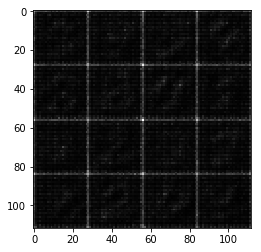

Epoch 1/2... Generator Loss: 0.7167 Discriminator Loss: 1.4513...
Epoch 1/2... Generator Loss: 1.2253 Discriminator Loss: 1.3442...
Epoch 1/2... Generator Loss: 1.2028 Discriminator Loss: 1.2681...
Epoch 1/2... Generator Loss: 0.6307 Discriminator Loss: 1.4089...
Epoch 1/2... Generator Loss: 0.7001 Discriminator Loss: 1.5236...
Epoch 1/2... Generator Loss: 1.2946 Discriminator Loss: 1.2835...
Epoch 1/2... Generator Loss: 0.9076 Discriminator Loss: 1.1677...
Epoch 1/2... Generator Loss: 0.9900 Discriminator Loss: 1.1025...
Epoch 1/2... Generator Loss: 1.1305 Discriminator Loss: 1.1041...
Epoch 1/2... Generator Loss: 0.5341 Discriminator Loss: 1.4080...


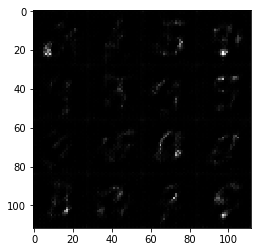

Epoch 1/2... Generator Loss: 1.1456 Discriminator Loss: 1.1686...
Epoch 1/2... Generator Loss: 1.4136 Discriminator Loss: 0.9574...
Epoch 1/2... Generator Loss: 1.3156 Discriminator Loss: 1.0078...
Epoch 1/2... Generator Loss: 0.6983 Discriminator Loss: 1.1733...
Epoch 1/2... Generator Loss: 0.9602 Discriminator Loss: 1.1281...
Epoch 1/2... Generator Loss: 1.8962 Discriminator Loss: 1.1859...
Epoch 1/2... Generator Loss: 1.2910 Discriminator Loss: 0.9560...
Epoch 1/2... Generator Loss: 0.6588 Discriminator Loss: 1.2125...
Epoch 1/2... Generator Loss: 0.7100 Discriminator Loss: 1.1737...
Epoch 1/2... Generator Loss: 0.7506 Discriminator Loss: 1.2288...


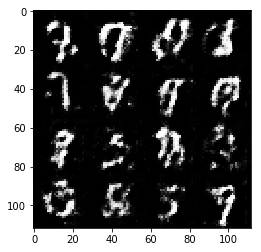

Epoch 1/2... Generator Loss: 1.0164 Discriminator Loss: 1.0122...
Epoch 1/2... Generator Loss: 1.3067 Discriminator Loss: 0.9721...
Epoch 1/2... Generator Loss: 1.6287 Discriminator Loss: 1.1056...
Epoch 1/2... Generator Loss: 0.8422 Discriminator Loss: 1.1754...
Epoch 1/2... Generator Loss: 1.0617 Discriminator Loss: 0.8828...
Epoch 1/2... Generator Loss: 1.2711 Discriminator Loss: 0.8667...
Epoch 1/2... Generator Loss: 1.0361 Discriminator Loss: 0.9327...
Epoch 1/2... Generator Loss: 1.1654 Discriminator Loss: 1.0479...
Epoch 1/2... Generator Loss: 1.0271 Discriminator Loss: 1.0517...
Epoch 1/2... Generator Loss: 0.5040 Discriminator Loss: 1.4420...


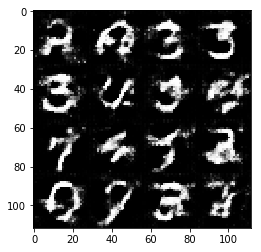

Epoch 1/2... Generator Loss: 0.5750 Discriminator Loss: 1.6466...
Epoch 1/2... Generator Loss: 1.4067 Discriminator Loss: 0.8756...
Epoch 1/2... Generator Loss: 1.2697 Discriminator Loss: 0.9954...
Epoch 1/2... Generator Loss: 0.8451 Discriminator Loss: 1.3335...
Epoch 1/2... Generator Loss: 1.0624 Discriminator Loss: 1.0896...
Epoch 1/2... Generator Loss: 0.9321 Discriminator Loss: 1.1387...
Epoch 1/2... Generator Loss: 0.5700 Discriminator Loss: 1.4052...
Epoch 1/2... Generator Loss: 0.8991 Discriminator Loss: 1.2251...
Epoch 1/2... Generator Loss: 0.8364 Discriminator Loss: 1.1914...
Epoch 1/2... Generator Loss: 0.6145 Discriminator Loss: 1.2538...


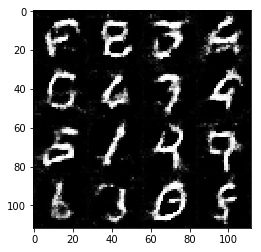

Epoch 1/2... Generator Loss: 0.7317 Discriminator Loss: 1.2009...
Epoch 1/2... Generator Loss: 0.6523 Discriminator Loss: 1.3111...
Epoch 1/2... Generator Loss: 0.8631 Discriminator Loss: 1.3044...
Epoch 1/2... Generator Loss: 0.8857 Discriminator Loss: 1.2407...
Epoch 1/2... Generator Loss: 1.4685 Discriminator Loss: 0.9988...
Epoch 1/2... Generator Loss: 1.5193 Discriminator Loss: 1.1631...
Epoch 1/2... Generator Loss: 0.8812 Discriminator Loss: 1.1954...
Epoch 1/2... Generator Loss: 1.5323 Discriminator Loss: 1.0988...
Epoch 1/2... Generator Loss: 0.7704 Discriminator Loss: 1.0453...
Epoch 1/2... Generator Loss: 0.7414 Discriminator Loss: 1.1582...


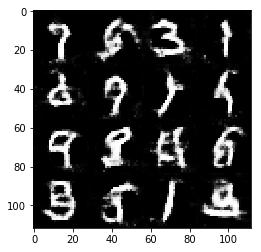

Epoch 1/2... Generator Loss: 0.8210 Discriminator Loss: 1.2237...
Epoch 1/2... Generator Loss: 0.4850 Discriminator Loss: 1.4869...
Epoch 1/2... Generator Loss: 0.7837 Discriminator Loss: 1.2716...
Epoch 1/2... Generator Loss: 1.4045 Discriminator Loss: 1.2743...
Epoch 1/2... Generator Loss: 1.0103 Discriminator Loss: 1.1292...
Epoch 1/2... Generator Loss: 1.0315 Discriminator Loss: 1.1383...
Epoch 1/2... Generator Loss: 0.7852 Discriminator Loss: 1.1870...
Epoch 1/2... Generator Loss: 1.1942 Discriminator Loss: 0.9724...
Epoch 1/2... Generator Loss: 0.6523 Discriminator Loss: 1.4236...
Epoch 1/2... Generator Loss: 1.4464 Discriminator Loss: 0.9163...


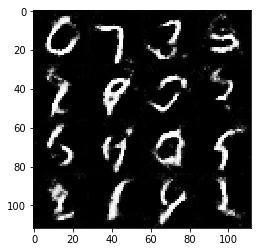

Epoch 1/2... Generator Loss: 0.8046 Discriminator Loss: 1.1861...
Epoch 1/2... Generator Loss: 1.0437 Discriminator Loss: 1.2949...
Epoch 1/2... Generator Loss: 0.8479 Discriminator Loss: 1.2858...
Epoch 1/2... Generator Loss: 0.8781 Discriminator Loss: 1.0979...
Epoch 1/2... Generator Loss: 1.4846 Discriminator Loss: 1.1189...
Epoch 1/2... Generator Loss: 1.5372 Discriminator Loss: 0.8046...
Epoch 1/2... Generator Loss: 1.0459 Discriminator Loss: 1.0814...
Epoch 1/2... Generator Loss: 1.3412 Discriminator Loss: 1.0864...
Epoch 1/2... Generator Loss: 0.8935 Discriminator Loss: 1.1930...
Epoch 1/2... Generator Loss: 0.4443 Discriminator Loss: 1.6322...


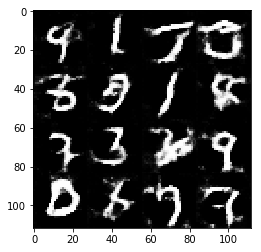

Epoch 1/2... Generator Loss: 1.2069 Discriminator Loss: 0.9361...
Epoch 1/2... Generator Loss: 0.8083 Discriminator Loss: 1.2391...
Epoch 1/2... Generator Loss: 0.7735 Discriminator Loss: 1.3308...
Epoch 1/2... Generator Loss: 1.2280 Discriminator Loss: 1.1419...
Epoch 1/2... Generator Loss: 0.9237 Discriminator Loss: 1.0671...
Epoch 1/2... Generator Loss: 1.2310 Discriminator Loss: 1.3451...
Epoch 1/2... Generator Loss: 0.7933 Discriminator Loss: 1.1596...
Epoch 1/2... Generator Loss: 0.7035 Discriminator Loss: 1.3329...
Epoch 1/2... Generator Loss: 0.7951 Discriminator Loss: 1.1414...
Epoch 1/2... Generator Loss: 1.2350 Discriminator Loss: 0.9907...


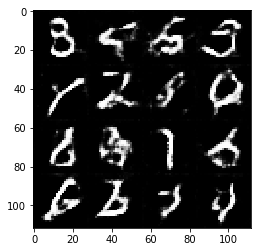

Epoch 1/2... Generator Loss: 1.1659 Discriminator Loss: 1.0553...
Epoch 1/2... Generator Loss: 1.4954 Discriminator Loss: 1.1392...
Epoch 1/2... Generator Loss: 1.0788 Discriminator Loss: 1.1038...
Epoch 1/2... Generator Loss: 0.9354 Discriminator Loss: 1.1664...
Epoch 1/2... Generator Loss: 1.3619 Discriminator Loss: 1.1137...
Epoch 1/2... Generator Loss: 1.0476 Discriminator Loss: 0.9902...
Epoch 1/2... Generator Loss: 1.3190 Discriminator Loss: 0.9791...
Epoch 1/2... Generator Loss: 1.3167 Discriminator Loss: 0.9898...
Epoch 1/2... Generator Loss: 1.0719 Discriminator Loss: 1.1393...
Epoch 1/2... Generator Loss: 0.8521 Discriminator Loss: 1.1966...


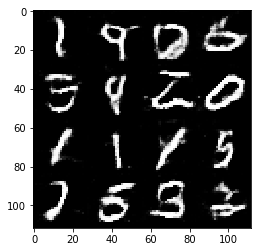

Epoch 1/2... Generator Loss: 0.6221 Discriminator Loss: 1.2926...
Epoch 1/2... Generator Loss: 1.1635 Discriminator Loss: 1.0835...
Epoch 1/2... Generator Loss: 0.8376 Discriminator Loss: 0.9796...
Epoch 1/2... Generator Loss: 0.9573 Discriminator Loss: 1.0586...
Epoch 1/2... Generator Loss: 1.3511 Discriminator Loss: 0.9579...
Epoch 1/2... Generator Loss: 0.9293 Discriminator Loss: 1.0278...
Epoch 1/2... Generator Loss: 1.0669 Discriminator Loss: 1.0742...
Epoch 1/2... Generator Loss: 0.8502 Discriminator Loss: 1.1800...
Epoch 1/2... Generator Loss: 1.1047 Discriminator Loss: 1.0123...
Epoch 1/2... Generator Loss: 0.7741 Discriminator Loss: 1.1568...


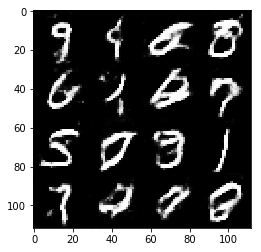

Epoch 1/2... Generator Loss: 0.6491 Discriminator Loss: 1.1681...
Epoch 1/2... Generator Loss: 0.8701 Discriminator Loss: 1.0914...
Epoch 1/2... Generator Loss: 1.2107 Discriminator Loss: 0.9528...
Epoch 1/2... Generator Loss: 1.1340 Discriminator Loss: 1.3185...
Epoch 1/2... Generator Loss: 1.0090 Discriminator Loss: 1.0091...
Epoch 1/2... Generator Loss: 1.3145 Discriminator Loss: 0.9473...
Epoch 1/2... Generator Loss: 1.0895 Discriminator Loss: 1.0917...
Epoch 1/2... Generator Loss: 0.7050 Discriminator Loss: 1.2063...
Epoch 1/2... Generator Loss: 1.7936 Discriminator Loss: 1.0548...
Epoch 1/2... Generator Loss: 1.3455 Discriminator Loss: 0.9046...


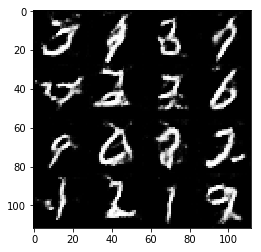

Epoch 1/2... Generator Loss: 1.4766 Discriminator Loss: 0.9256...
Epoch 1/2... Generator Loss: 1.3166 Discriminator Loss: 0.8919...
Epoch 1/2... Generator Loss: 0.5283 Discriminator Loss: 1.5962...
Epoch 1/2... Generator Loss: 0.9041 Discriminator Loss: 1.0232...
Epoch 1/2... Generator Loss: 1.0272 Discriminator Loss: 1.0340...
Epoch 1/2... Generator Loss: 1.1100 Discriminator Loss: 0.9599...
Epoch 1/2... Generator Loss: 1.0424 Discriminator Loss: 1.0498...
Epoch 1/2... Generator Loss: 1.3831 Discriminator Loss: 0.8344...
Epoch 1/2... Generator Loss: 0.8751 Discriminator Loss: 1.0917...
Epoch 1/2... Generator Loss: 1.0278 Discriminator Loss: 1.0876...


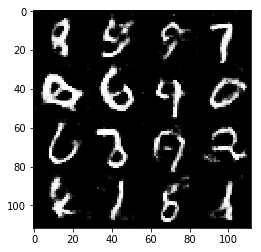

Epoch 1/2... Generator Loss: 1.6084 Discriminator Loss: 0.9043...
Epoch 1/2... Generator Loss: 1.0830 Discriminator Loss: 1.0660...
Epoch 1/2... Generator Loss: 0.6363 Discriminator Loss: 1.3618...
Epoch 1/2... Generator Loss: 1.2613 Discriminator Loss: 1.0444...
Epoch 1/2... Generator Loss: 1.1287 Discriminator Loss: 1.0849...
Epoch 1/2... Generator Loss: 0.8614 Discriminator Loss: 1.2920...
Epoch 1/2... Generator Loss: 0.8347 Discriminator Loss: 1.0470...
Epoch 1/2... Generator Loss: 1.3322 Discriminator Loss: 0.8798...
Epoch 1/2... Generator Loss: 1.7816 Discriminator Loss: 0.8939...
Epoch 1/2... Generator Loss: 0.4565 Discriminator Loss: 1.5697...


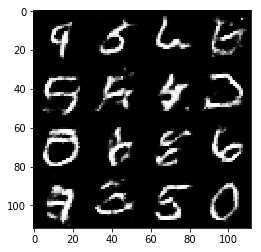

Epoch 1/2... Generator Loss: 1.1264 Discriminator Loss: 0.9811...
Epoch 1/2... Generator Loss: 1.0921 Discriminator Loss: 1.0464...
Epoch 1/2... Generator Loss: 1.0650 Discriminator Loss: 1.0466...
Epoch 1/2... Generator Loss: 1.0314 Discriminator Loss: 1.0940...
Epoch 1/2... Generator Loss: 0.9402 Discriminator Loss: 1.0391...
Epoch 1/2... Generator Loss: 0.7497 Discriminator Loss: 1.1873...
Epoch 1/2... Generator Loss: 0.6532 Discriminator Loss: 1.2490...
Epoch 1/2... Generator Loss: 1.0667 Discriminator Loss: 0.9571...
Epoch 1/2... Generator Loss: 0.7803 Discriminator Loss: 1.2882...
Epoch 1/2... Generator Loss: 0.9474 Discriminator Loss: 0.9710...


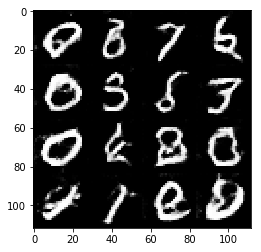

Epoch 1/2... Generator Loss: 0.4180 Discriminator Loss: 1.5972...
Epoch 1/2... Generator Loss: 1.3330 Discriminator Loss: 0.8639...
Epoch 1/2... Generator Loss: 0.9577 Discriminator Loss: 1.0890...
Epoch 1/2... Generator Loss: 1.0753 Discriminator Loss: 0.9290...
Epoch 1/2... Generator Loss: 1.3431 Discriminator Loss: 1.0284...
Epoch 1/2... Generator Loss: 1.0392 Discriminator Loss: 1.0656...
Epoch 1/2... Generator Loss: 1.3994 Discriminator Loss: 0.9987...
Epoch 1/2... Generator Loss: 1.0545 Discriminator Loss: 1.0531...
Epoch 1/2... Generator Loss: 1.6049 Discriminator Loss: 1.1113...
Epoch 1/2... Generator Loss: 1.0258 Discriminator Loss: 1.1302...


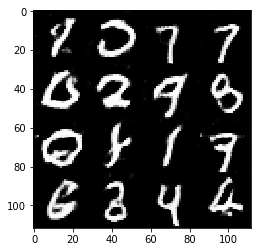

Epoch 1/2... Generator Loss: 0.8986 Discriminator Loss: 1.1478...
Epoch 1/2... Generator Loss: 1.1309 Discriminator Loss: 0.9579...
Epoch 1/2... Generator Loss: 1.2241 Discriminator Loss: 0.9481...
Epoch 1/2... Generator Loss: 0.9563 Discriminator Loss: 1.1109...
Epoch 1/2... Generator Loss: 1.1957 Discriminator Loss: 0.9307...
Epoch 1/2... Generator Loss: 1.1283 Discriminator Loss: 0.9824...
Epoch 1/2... Generator Loss: 0.5905 Discriminator Loss: 1.4310...
Epoch 1/2... Generator Loss: 1.5348 Discriminator Loss: 0.7779...
Epoch 1/2... Generator Loss: 0.9119 Discriminator Loss: 1.1963...
Epoch 1/2... Generator Loss: 1.1678 Discriminator Loss: 0.9790...


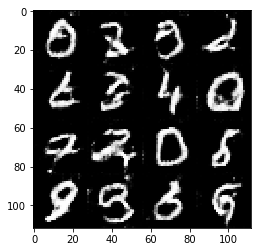

Epoch 1/2... Generator Loss: 1.0146 Discriminator Loss: 1.0068...
Epoch 1/2... Generator Loss: 1.1575 Discriminator Loss: 1.0000...
Epoch 1/2... Generator Loss: 1.0988 Discriminator Loss: 1.0091...
Epoch 1/2... Generator Loss: 1.2109 Discriminator Loss: 0.8860...
Epoch 1/2... Generator Loss: 1.1609 Discriminator Loss: 0.9045...
Epoch 1/2... Generator Loss: 0.9466 Discriminator Loss: 1.0793...
Epoch 1/2... Generator Loss: 0.6055 Discriminator Loss: 1.2937...
Epoch 1/2... Generator Loss: 1.4178 Discriminator Loss: 0.8570...
Epoch 1/2... Generator Loss: 1.3781 Discriminator Loss: 0.9108...
Epoch 1/2... Generator Loss: 1.2732 Discriminator Loss: 0.8836...


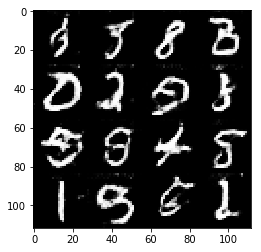

Epoch 1/2... Generator Loss: 1.0882 Discriminator Loss: 1.0230...
Epoch 1/2... Generator Loss: 1.3842 Discriminator Loss: 0.7869...
Epoch 1/2... Generator Loss: 1.2010 Discriminator Loss: 1.0046...
Epoch 1/2... Generator Loss: 1.6490 Discriminator Loss: 1.0126...
Epoch 1/2... Generator Loss: 0.7800 Discriminator Loss: 1.1413...
Epoch 1/2... Generator Loss: 0.6694 Discriminator Loss: 1.3429...
Epoch 1/2... Generator Loss: 1.1032 Discriminator Loss: 0.9028...
Epoch 2/2... Generator Loss: 1.4342 Discriminator Loss: 1.0976...
Epoch 2/2... Generator Loss: 0.8002 Discriminator Loss: 1.1837...
Epoch 2/2... Generator Loss: 1.3510 Discriminator Loss: 0.9854...


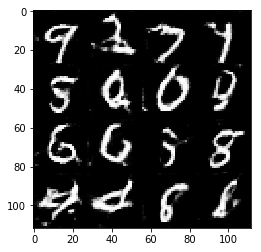

Epoch 2/2... Generator Loss: 1.4449 Discriminator Loss: 0.9241...
Epoch 2/2... Generator Loss: 0.9078 Discriminator Loss: 1.1193...
Epoch 2/2... Generator Loss: 1.0151 Discriminator Loss: 1.1593...
Epoch 2/2... Generator Loss: 1.4313 Discriminator Loss: 1.0294...
Epoch 2/2... Generator Loss: 1.2189 Discriminator Loss: 0.8456...
Epoch 2/2... Generator Loss: 1.3952 Discriminator Loss: 0.9469...
Epoch 2/2... Generator Loss: 1.0325 Discriminator Loss: 1.0288...
Epoch 2/2... Generator Loss: 0.7805 Discriminator Loss: 1.2196...
Epoch 2/2... Generator Loss: 0.8741 Discriminator Loss: 1.2131...
Epoch 2/2... Generator Loss: 1.1599 Discriminator Loss: 0.9880...


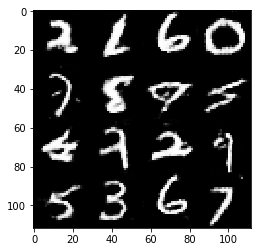

Epoch 2/2... Generator Loss: 1.0133 Discriminator Loss: 0.9614...
Epoch 2/2... Generator Loss: 1.4703 Discriminator Loss: 0.7714...
Epoch 2/2... Generator Loss: 0.8653 Discriminator Loss: 1.1862...
Epoch 2/2... Generator Loss: 1.8457 Discriminator Loss: 0.8287...
Epoch 2/2... Generator Loss: 0.7733 Discriminator Loss: 1.1124...
Epoch 2/2... Generator Loss: 1.4463 Discriminator Loss: 0.8217...
Epoch 2/2... Generator Loss: 1.1615 Discriminator Loss: 0.8645...
Epoch 2/2... Generator Loss: 1.6669 Discriminator Loss: 1.1465...
Epoch 2/2... Generator Loss: 1.4781 Discriminator Loss: 0.8579...
Epoch 2/2... Generator Loss: 1.9709 Discriminator Loss: 0.8505...


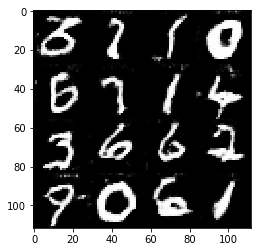

Epoch 2/2... Generator Loss: 0.8852 Discriminator Loss: 1.1725...
Epoch 2/2... Generator Loss: 2.4532 Discriminator Loss: 1.2391...
Epoch 2/2... Generator Loss: 0.8786 Discriminator Loss: 1.0477...
Epoch 2/2... Generator Loss: 1.6333 Discriminator Loss: 0.9234...
Epoch 2/2... Generator Loss: 0.6358 Discriminator Loss: 1.4061...
Epoch 2/2... Generator Loss: 0.5266 Discriminator Loss: 1.5012...
Epoch 2/2... Generator Loss: 1.3875 Discriminator Loss: 0.8853...
Epoch 2/2... Generator Loss: 1.2292 Discriminator Loss: 0.9203...
Epoch 2/2... Generator Loss: 1.4119 Discriminator Loss: 0.7921...
Epoch 2/2... Generator Loss: 1.4601 Discriminator Loss: 0.8422...


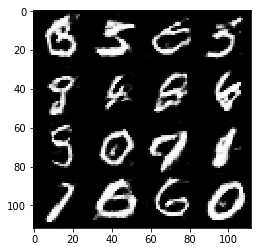

Epoch 2/2... Generator Loss: 1.8592 Discriminator Loss: 0.8431...
Epoch 2/2... Generator Loss: 1.3734 Discriminator Loss: 0.8438...
Epoch 2/2... Generator Loss: 1.1700 Discriminator Loss: 0.9999...
Epoch 2/2... Generator Loss: 2.0826 Discriminator Loss: 0.8670...
Epoch 2/2... Generator Loss: 1.6076 Discriminator Loss: 0.9465...
Epoch 2/2... Generator Loss: 2.1699 Discriminator Loss: 1.1407...
Epoch 2/2... Generator Loss: 1.2601 Discriminator Loss: 1.0119...
Epoch 2/2... Generator Loss: 0.9560 Discriminator Loss: 1.0079...
Epoch 2/2... Generator Loss: 1.4935 Discriminator Loss: 0.9147...
Epoch 2/2... Generator Loss: 0.7864 Discriminator Loss: 1.1400...


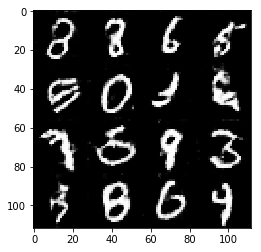

Epoch 2/2... Generator Loss: 1.1275 Discriminator Loss: 0.9708...
Epoch 2/2... Generator Loss: 0.4936 Discriminator Loss: 1.5590...
Epoch 2/2... Generator Loss: 1.0658 Discriminator Loss: 1.0130...
Epoch 2/2... Generator Loss: 1.1504 Discriminator Loss: 0.9811...
Epoch 2/2... Generator Loss: 1.1172 Discriminator Loss: 0.8173...
Epoch 2/2... Generator Loss: 1.1183 Discriminator Loss: 1.0108...
Epoch 2/2... Generator Loss: 1.6180 Discriminator Loss: 1.0264...
Epoch 2/2... Generator Loss: 0.7033 Discriminator Loss: 1.3318...
Epoch 2/2... Generator Loss: 1.0062 Discriminator Loss: 0.9252...
Epoch 2/2... Generator Loss: 0.9405 Discriminator Loss: 1.0692...


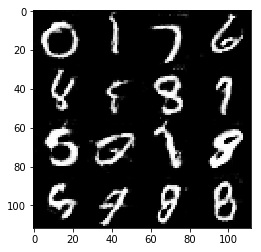

Epoch 2/2... Generator Loss: 0.8927 Discriminator Loss: 1.1207...
Epoch 2/2... Generator Loss: 1.5561 Discriminator Loss: 0.8568...
Epoch 2/2... Generator Loss: 1.1627 Discriminator Loss: 0.8977...
Epoch 2/2... Generator Loss: 2.4929 Discriminator Loss: 1.2322...
Epoch 2/2... Generator Loss: 1.1057 Discriminator Loss: 0.9246...
Epoch 2/2... Generator Loss: 1.1627 Discriminator Loss: 0.8042...
Epoch 2/2... Generator Loss: 0.8140 Discriminator Loss: 1.0774...
Epoch 2/2... Generator Loss: 1.7810 Discriminator Loss: 0.9372...
Epoch 2/2... Generator Loss: 1.2561 Discriminator Loss: 0.8045...
Epoch 2/2... Generator Loss: 0.6114 Discriminator Loss: 1.3726...


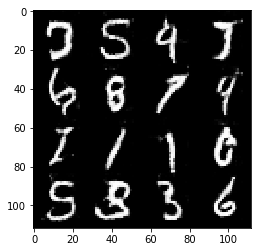

Epoch 2/2... Generator Loss: 0.9646 Discriminator Loss: 0.9726...
Epoch 2/2... Generator Loss: 2.2493 Discriminator Loss: 0.6773...
Epoch 2/2... Generator Loss: 0.7516 Discriminator Loss: 1.2665...
Epoch 2/2... Generator Loss: 1.6590 Discriminator Loss: 0.8872...
Epoch 2/2... Generator Loss: 1.0134 Discriminator Loss: 0.9510...
Epoch 2/2... Generator Loss: 1.0536 Discriminator Loss: 0.9416...
Epoch 2/2... Generator Loss: 0.9122 Discriminator Loss: 1.0931...
Epoch 2/2... Generator Loss: 0.6787 Discriminator Loss: 1.3614...
Epoch 2/2... Generator Loss: 1.2560 Discriminator Loss: 0.9754...
Epoch 2/2... Generator Loss: 1.0276 Discriminator Loss: 1.0968...


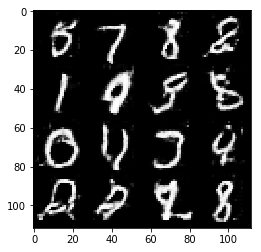

Epoch 2/2... Generator Loss: 1.3082 Discriminator Loss: 1.1243...
Epoch 2/2... Generator Loss: 1.1117 Discriminator Loss: 1.0155...
Epoch 2/2... Generator Loss: 1.0523 Discriminator Loss: 0.9968...
Epoch 2/2... Generator Loss: 0.8097 Discriminator Loss: 1.1909...
Epoch 2/2... Generator Loss: 1.3916 Discriminator Loss: 1.0107...
Epoch 2/2... Generator Loss: 1.1721 Discriminator Loss: 1.0022...
Epoch 2/2... Generator Loss: 1.1378 Discriminator Loss: 0.8932...
Epoch 2/2... Generator Loss: 1.9848 Discriminator Loss: 0.7737...
Epoch 2/2... Generator Loss: 1.3176 Discriminator Loss: 0.8743...
Epoch 2/2... Generator Loss: 0.9009 Discriminator Loss: 1.1324...


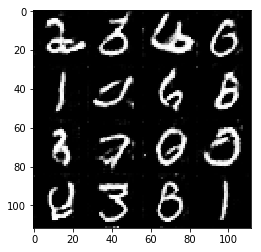

Epoch 2/2... Generator Loss: 1.9235 Discriminator Loss: 0.6686...
Epoch 2/2... Generator Loss: 1.2698 Discriminator Loss: 0.8006...
Epoch 2/2... Generator Loss: 0.7563 Discriminator Loss: 1.0730...
Epoch 2/2... Generator Loss: 1.4924 Discriminator Loss: 0.8018...
Epoch 2/2... Generator Loss: 1.3546 Discriminator Loss: 0.7696...
Epoch 2/2... Generator Loss: 1.2023 Discriminator Loss: 0.8481...
Epoch 2/2... Generator Loss: 1.4810 Discriminator Loss: 0.8939...
Epoch 2/2... Generator Loss: 1.6659 Discriminator Loss: 0.8224...
Epoch 2/2... Generator Loss: 0.7654 Discriminator Loss: 1.1806...
Epoch 2/2... Generator Loss: 2.1578 Discriminator Loss: 1.0262...


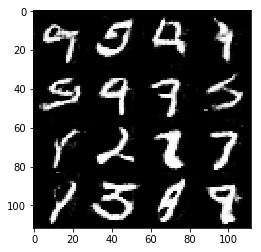

Epoch 2/2... Generator Loss: 1.8193 Discriminator Loss: 0.8581...
Epoch 2/2... Generator Loss: 1.0391 Discriminator Loss: 0.9999...
Epoch 2/2... Generator Loss: 1.6237 Discriminator Loss: 0.8109...
Epoch 2/2... Generator Loss: 0.8861 Discriminator Loss: 1.0222...
Epoch 2/2... Generator Loss: 1.2336 Discriminator Loss: 0.9443...
Epoch 2/2... Generator Loss: 0.8626 Discriminator Loss: 1.0783...
Epoch 2/2... Generator Loss: 0.9998 Discriminator Loss: 1.0409...
Epoch 2/2... Generator Loss: 1.2402 Discriminator Loss: 0.8800...
Epoch 2/2... Generator Loss: 1.3039 Discriminator Loss: 0.8212...
Epoch 2/2... Generator Loss: 2.2645 Discriminator Loss: 1.0596...


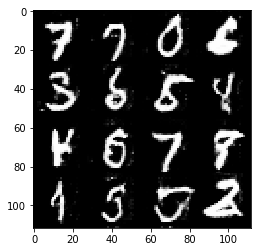

Epoch 2/2... Generator Loss: 0.7502 Discriminator Loss: 1.1518...
Epoch 2/2... Generator Loss: 1.1944 Discriminator Loss: 1.0526...
Epoch 2/2... Generator Loss: 1.3415 Discriminator Loss: 0.7629...
Epoch 2/2... Generator Loss: 0.9888 Discriminator Loss: 1.0504...
Epoch 2/2... Generator Loss: 0.9377 Discriminator Loss: 1.0594...
Epoch 2/2... Generator Loss: 1.6824 Discriminator Loss: 0.8179...
Epoch 2/2... Generator Loss: 1.4967 Discriminator Loss: 0.7297...
Epoch 2/2... Generator Loss: 1.3427 Discriminator Loss: 0.8205...
Epoch 2/2... Generator Loss: 1.2790 Discriminator Loss: 0.8833...
Epoch 2/2... Generator Loss: 1.4438 Discriminator Loss: 0.8282...


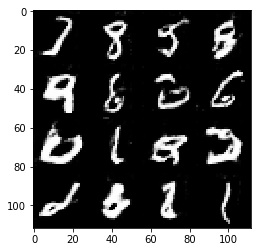

Epoch 2/2... Generator Loss: 1.1694 Discriminator Loss: 0.9015...
Epoch 2/2... Generator Loss: 1.3945 Discriminator Loss: 0.9265...
Epoch 2/2... Generator Loss: 1.2755 Discriminator Loss: 0.8275...
Epoch 2/2... Generator Loss: 1.3384 Discriminator Loss: 0.9296...
Epoch 2/2... Generator Loss: 1.5465 Discriminator Loss: 0.7510...
Epoch 2/2... Generator Loss: 2.1031 Discriminator Loss: 0.6913...
Epoch 2/2... Generator Loss: 1.4426 Discriminator Loss: 0.7232...
Epoch 2/2... Generator Loss: 1.1996 Discriminator Loss: 0.8369...
Epoch 2/2... Generator Loss: 1.3638 Discriminator Loss: 1.2712...
Epoch 2/2... Generator Loss: 1.2161 Discriminator Loss: 0.9510...


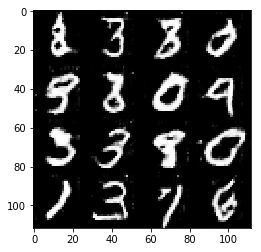

Epoch 2/2... Generator Loss: 1.8270 Discriminator Loss: 0.6857...
Epoch 2/2... Generator Loss: 0.8313 Discriminator Loss: 1.2150...
Epoch 2/2... Generator Loss: 1.4651 Discriminator Loss: 0.9648...
Epoch 2/2... Generator Loss: 0.5154 Discriminator Loss: 1.6779...
Epoch 2/2... Generator Loss: 0.9390 Discriminator Loss: 1.1139...
Epoch 2/2... Generator Loss: 1.1973 Discriminator Loss: 0.7338...
Epoch 2/2... Generator Loss: 1.0324 Discriminator Loss: 0.9845...
Epoch 2/2... Generator Loss: 0.6461 Discriminator Loss: 1.3877...
Epoch 2/2... Generator Loss: 1.3697 Discriminator Loss: 0.8030...
Epoch 2/2... Generator Loss: 1.4058 Discriminator Loss: 0.7686...


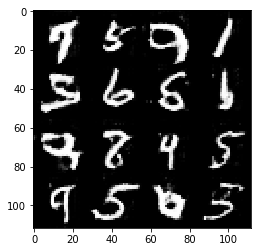

Epoch 2/2... Generator Loss: 1.7626 Discriminator Loss: 0.7420...
Epoch 2/2... Generator Loss: 1.1065 Discriminator Loss: 0.9780...
Epoch 2/2... Generator Loss: 0.8813 Discriminator Loss: 0.9990...
Epoch 2/2... Generator Loss: 1.3175 Discriminator Loss: 0.7218...
Epoch 2/2... Generator Loss: 1.3372 Discriminator Loss: 0.7635...
Epoch 2/2... Generator Loss: 1.2442 Discriminator Loss: 0.7874...
Epoch 2/2... Generator Loss: 1.5112 Discriminator Loss: 0.8585...
Epoch 2/2... Generator Loss: 1.7606 Discriminator Loss: 0.8505...
Epoch 2/2... Generator Loss: 1.4398 Discriminator Loss: 0.8242...
Epoch 2/2... Generator Loss: 1.7498 Discriminator Loss: 0.7795...


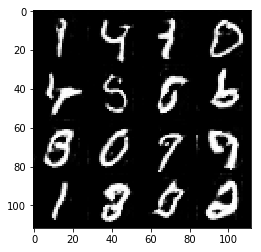

Epoch 2/2... Generator Loss: 1.7739 Discriminator Loss: 0.7808...
Epoch 2/2... Generator Loss: 1.6491 Discriminator Loss: 0.8452...
Epoch 2/2... Generator Loss: 1.7009 Discriminator Loss: 0.6909...
Epoch 2/2... Generator Loss: 1.9110 Discriminator Loss: 0.6709...
Epoch 2/2... Generator Loss: 1.3439 Discriminator Loss: 0.9393...
Epoch 2/2... Generator Loss: 2.1269 Discriminator Loss: 0.5915...
Epoch 2/2... Generator Loss: 1.0040 Discriminator Loss: 1.0709...
Epoch 2/2... Generator Loss: 0.8609 Discriminator Loss: 1.1062...
Epoch 2/2... Generator Loss: 2.6616 Discriminator Loss: 0.5799...
Epoch 2/2... Generator Loss: 1.2052 Discriminator Loss: 0.7690...


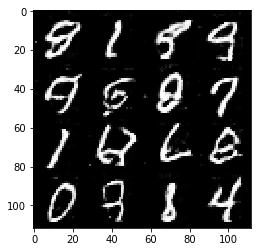

Epoch 2/2... Generator Loss: 0.8756 Discriminator Loss: 1.0799...
Epoch 2/2... Generator Loss: 1.8959 Discriminator Loss: 0.6568...
Epoch 2/2... Generator Loss: 1.0530 Discriminator Loss: 1.0312...
Epoch 2/2... Generator Loss: 1.4232 Discriminator Loss: 0.6694...
Epoch 2/2... Generator Loss: 1.2169 Discriminator Loss: 0.9302...
Epoch 2/2... Generator Loss: 0.9752 Discriminator Loss: 1.0729...
Epoch 2/2... Generator Loss: 1.9964 Discriminator Loss: 0.6492...
Epoch 2/2... Generator Loss: 1.9590 Discriminator Loss: 0.6772...
Epoch 2/2... Generator Loss: 1.6439 Discriminator Loss: 0.8458...
Epoch 2/2... Generator Loss: 1.6618 Discriminator Loss: 0.7575...


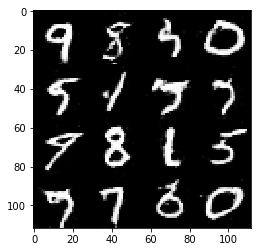

Epoch 2/2... Generator Loss: 1.1885 Discriminator Loss: 0.9801...
Epoch 2/2... Generator Loss: 2.5865 Discriminator Loss: 0.6367...
Epoch 2/2... Generator Loss: 1.4853 Discriminator Loss: 0.7137...
Epoch 2/2... Generator Loss: 1.8217 Discriminator Loss: 0.6956...
Epoch 2/2... Generator Loss: 2.1184 Discriminator Loss: 0.6573...
Epoch 2/2... Generator Loss: 0.6213 Discriminator Loss: 1.5085...
Epoch 2/2... Generator Loss: 1.5550 Discriminator Loss: 0.7287...
Epoch 2/2... Generator Loss: 2.0917 Discriminator Loss: 0.5911...
Epoch 2/2... Generator Loss: 0.3094 Discriminator Loss: 1.9161...
Epoch 2/2... Generator Loss: 1.0029 Discriminator Loss: 1.0076...


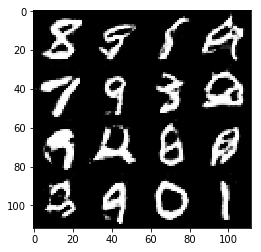

Epoch 2/2... Generator Loss: 1.9770 Discriminator Loss: 0.6978...
Epoch 2/2... Generator Loss: 1.1550 Discriminator Loss: 0.9859...
Epoch 2/2... Generator Loss: 1.3660 Discriminator Loss: 0.7034...
Epoch 2/2... Generator Loss: 0.9038 Discriminator Loss: 1.1642...
Epoch 2/2... Generator Loss: 1.5216 Discriminator Loss: 0.7936...
Epoch 2/2... Generator Loss: 1.2156 Discriminator Loss: 0.8988...
Epoch 2/2... Generator Loss: 1.3492 Discriminator Loss: 0.9312...
Epoch 2/2... Generator Loss: 1.1694 Discriminator Loss: 1.0198...
Epoch 2/2... Generator Loss: 1.6170 Discriminator Loss: 0.8429...
Epoch 2/2... Generator Loss: 1.3181 Discriminator Loss: 0.9756...


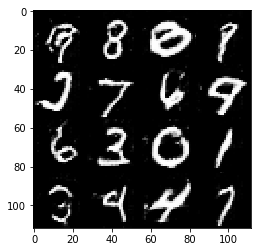

Epoch 2/2... Generator Loss: 2.0411 Discriminator Loss: 0.6476...
Epoch 2/2... Generator Loss: 1.0285 Discriminator Loss: 0.9688...
Epoch 2/2... Generator Loss: 1.2818 Discriminator Loss: 0.8495...
Epoch 2/2... Generator Loss: 1.6402 Discriminator Loss: 0.7950...
Epoch 2/2... Generator Loss: 2.7922 Discriminator Loss: 0.5704...


In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

initial output:


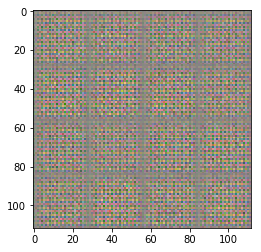

Epoch 1/1... Generator Loss: 2.8574 Discriminator Loss: 0.4795...
Epoch 1/1... Generator Loss: 1.2850 Discriminator Loss: 0.8876...
Epoch 1/1... Generator Loss: 2.8655 Discriminator Loss: 0.5281...
Epoch 1/1... Generator Loss: 1.9857 Discriminator Loss: 0.5529...
Epoch 1/1... Generator Loss: 4.0228 Discriminator Loss: 0.7168...
Epoch 1/1... Generator Loss: 1.1080 Discriminator Loss: 1.0123...
Epoch 1/1... Generator Loss: 3.2318 Discriminator Loss: 0.6533...
Epoch 1/1... Generator Loss: 2.1997 Discriminator Loss: 0.5724...
Epoch 1/1... Generator Loss: 1.4521 Discriminator Loss: 0.7544...
Epoch 1/1... Generator Loss: 1.3581 Discriminator Loss: 0.9950...


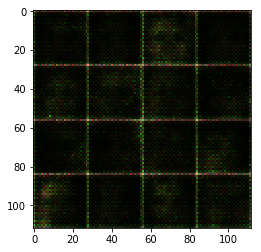

Epoch 1/1... Generator Loss: 2.9525 Discriminator Loss: 0.6933...
Epoch 1/1... Generator Loss: 2.2325 Discriminator Loss: 0.5358...
Epoch 1/1... Generator Loss: 3.3922 Discriminator Loss: 0.4349...
Epoch 1/1... Generator Loss: 3.6154 Discriminator Loss: 0.4806...
Epoch 1/1... Generator Loss: 9.4463 Discriminator Loss: 3.2998...
Epoch 1/1... Generator Loss: 2.2521 Discriminator Loss: 0.5810...
Epoch 1/1... Generator Loss: 2.4120 Discriminator Loss: 0.5970...
Epoch 1/1... Generator Loss: 1.0780 Discriminator Loss: 0.8990...
Epoch 1/1... Generator Loss: 1.7622 Discriminator Loss: 0.6400...
Epoch 1/1... Generator Loss: 0.9763 Discriminator Loss: 0.9694...


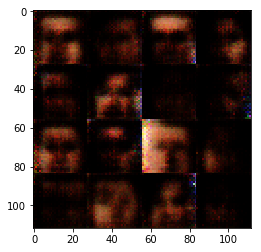

Epoch 1/1... Generator Loss: 0.7137 Discriminator Loss: 1.1118...
Epoch 1/1... Generator Loss: 2.6243 Discriminator Loss: 0.9654...
Epoch 1/1... Generator Loss: 1.3697 Discriminator Loss: 0.8302...
Epoch 1/1... Generator Loss: 0.6985 Discriminator Loss: 1.2620...
Epoch 1/1... Generator Loss: 1.6528 Discriminator Loss: 0.7880...
Epoch 1/1... Generator Loss: 0.5436 Discriminator Loss: 1.3362...
Epoch 1/1... Generator Loss: 1.2967 Discriminator Loss: 0.8884...
Epoch 1/1... Generator Loss: 2.0880 Discriminator Loss: 0.8547...
Epoch 1/1... Generator Loss: 3.2905 Discriminator Loss: 1.4719...
Epoch 1/1... Generator Loss: 0.9659 Discriminator Loss: 0.9969...


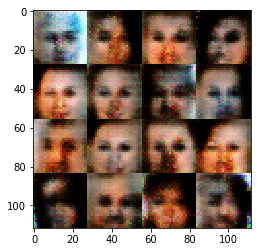

Epoch 1/1... Generator Loss: 0.9376 Discriminator Loss: 0.9680...
Epoch 1/1... Generator Loss: 2.3447 Discriminator Loss: 1.2830...
Epoch 1/1... Generator Loss: 1.1661 Discriminator Loss: 0.8346...
Epoch 1/1... Generator Loss: 1.6141 Discriminator Loss: 1.0020...
Epoch 1/1... Generator Loss: 0.5092 Discriminator Loss: 1.4694...
Epoch 1/1... Generator Loss: 1.6400 Discriminator Loss: 1.3089...
Epoch 1/1... Generator Loss: 1.1033 Discriminator Loss: 0.9215...
Epoch 1/1... Generator Loss: 0.5599 Discriminator Loss: 1.4123...
Epoch 1/1... Generator Loss: 1.5089 Discriminator Loss: 0.9071...
Epoch 1/1... Generator Loss: 0.9656 Discriminator Loss: 1.1720...


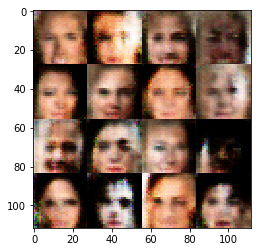

Epoch 1/1... Generator Loss: 0.6708 Discriminator Loss: 1.2494...
Epoch 1/1... Generator Loss: 2.6495 Discriminator Loss: 1.3586...
Epoch 1/1... Generator Loss: 1.1896 Discriminator Loss: 0.9149...
Epoch 1/1... Generator Loss: 0.4799 Discriminator Loss: 1.4500...
Epoch 1/1... Generator Loss: 1.1167 Discriminator Loss: 1.0468...
Epoch 1/1... Generator Loss: 0.8198 Discriminator Loss: 1.0105...
Epoch 1/1... Generator Loss: 0.4135 Discriminator Loss: 1.6878...
Epoch 1/1... Generator Loss: 2.1916 Discriminator Loss: 1.4113...
Epoch 1/1... Generator Loss: 0.8842 Discriminator Loss: 1.0433...
Epoch 1/1... Generator Loss: 0.7762 Discriminator Loss: 1.3171...


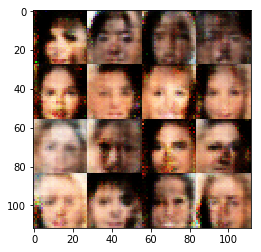

Epoch 1/1... Generator Loss: 0.9657 Discriminator Loss: 1.0026...
Epoch 1/1... Generator Loss: 0.6026 Discriminator Loss: 1.3152...
Epoch 1/1... Generator Loss: 1.1865 Discriminator Loss: 1.2385...
Epoch 1/1... Generator Loss: 0.9181 Discriminator Loss: 1.0442...
Epoch 1/1... Generator Loss: 1.0668 Discriminator Loss: 1.0030...
Epoch 1/1... Generator Loss: 1.0702 Discriminator Loss: 1.1235...
Epoch 1/1... Generator Loss: 0.8841 Discriminator Loss: 1.0782...
Epoch 1/1... Generator Loss: 0.9484 Discriminator Loss: 1.1777...
Epoch 1/1... Generator Loss: 1.0189 Discriminator Loss: 1.1274...
Epoch 1/1... Generator Loss: 0.7140 Discriminator Loss: 1.1311...


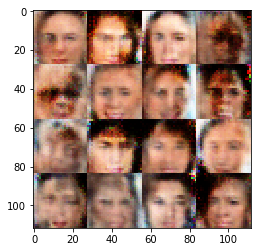

Epoch 1/1... Generator Loss: 1.3247 Discriminator Loss: 0.8760...
Epoch 1/1... Generator Loss: 2.5536 Discriminator Loss: 1.7653...
Epoch 1/1... Generator Loss: 1.4558 Discriminator Loss: 0.9307...
Epoch 1/1... Generator Loss: 0.9505 Discriminator Loss: 1.1044...
Epoch 1/1... Generator Loss: 1.6276 Discriminator Loss: 1.0788...
Epoch 1/1... Generator Loss: 0.8318 Discriminator Loss: 1.2291...
Epoch 1/1... Generator Loss: 2.3823 Discriminator Loss: 1.2923...
Epoch 1/1... Generator Loss: 0.5691 Discriminator Loss: 1.4848...
Epoch 1/1... Generator Loss: 1.4004 Discriminator Loss: 0.9917...
Epoch 1/1... Generator Loss: 1.3996 Discriminator Loss: 1.1723...


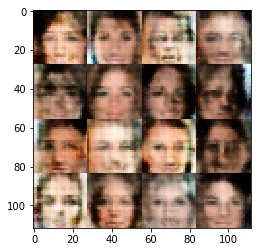

Epoch 1/1... Generator Loss: 0.4057 Discriminator Loss: 1.4562...
Epoch 1/1... Generator Loss: 0.7539 Discriminator Loss: 1.3151...
Epoch 1/1... Generator Loss: 1.7272 Discriminator Loss: 0.9271...
Epoch 1/1... Generator Loss: 0.8259 Discriminator Loss: 1.3293...
Epoch 1/1... Generator Loss: 1.4457 Discriminator Loss: 1.1286...
Epoch 1/1... Generator Loss: 0.8970 Discriminator Loss: 1.2055...
Epoch 1/1... Generator Loss: 0.8898 Discriminator Loss: 1.2079...
Epoch 1/1... Generator Loss: 0.9212 Discriminator Loss: 1.0525...
Epoch 1/1... Generator Loss: 1.2483 Discriminator Loss: 1.0064...
Epoch 1/1... Generator Loss: 1.3139 Discriminator Loss: 1.4898...


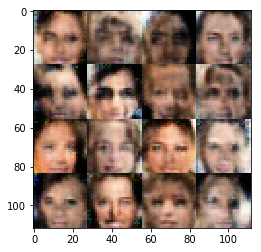

Epoch 1/1... Generator Loss: 0.4228 Discriminator Loss: 1.5749...
Epoch 1/1... Generator Loss: 1.1134 Discriminator Loss: 1.1133...
Epoch 1/1... Generator Loss: 1.4040 Discriminator Loss: 1.1111...
Epoch 1/1... Generator Loss: 0.6834 Discriminator Loss: 1.4113...
Epoch 1/1... Generator Loss: 1.3344 Discriminator Loss: 1.1610...
Epoch 1/1... Generator Loss: 0.8895 Discriminator Loss: 1.2569...
Epoch 1/1... Generator Loss: 1.5317 Discriminator Loss: 1.0726...
Epoch 1/1... Generator Loss: 1.5319 Discriminator Loss: 1.3372...
Epoch 1/1... Generator Loss: 0.7848 Discriminator Loss: 1.2739...
Epoch 1/1... Generator Loss: 0.6741 Discriminator Loss: 1.4079...


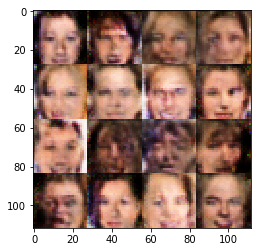

Epoch 1/1... Generator Loss: 1.3479 Discriminator Loss: 0.9351...
Epoch 1/1... Generator Loss: 0.6210 Discriminator Loss: 1.1733...
Epoch 1/1... Generator Loss: 0.7617 Discriminator Loss: 1.3353...
Epoch 1/1... Generator Loss: 0.9946 Discriminator Loss: 1.2088...
Epoch 1/1... Generator Loss: 1.0654 Discriminator Loss: 1.1169...
Epoch 1/1... Generator Loss: 0.6213 Discriminator Loss: 1.3949...
Epoch 1/1... Generator Loss: 1.2123 Discriminator Loss: 1.3048...
Epoch 1/1... Generator Loss: 0.9644 Discriminator Loss: 1.1706...
Epoch 1/1... Generator Loss: 0.4449 Discriminator Loss: 1.5503...
Epoch 1/1... Generator Loss: 0.9319 Discriminator Loss: 1.2122...


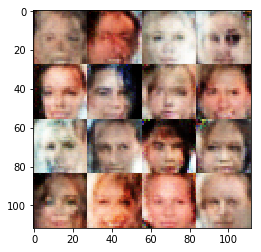

Epoch 1/1... Generator Loss: 0.5142 Discriminator Loss: 1.4266...
Epoch 1/1... Generator Loss: 0.8912 Discriminator Loss: 1.2833...
Epoch 1/1... Generator Loss: 1.7621 Discriminator Loss: 1.4795...
Epoch 1/1... Generator Loss: 1.2183 Discriminator Loss: 1.0531...
Epoch 1/1... Generator Loss: 0.8204 Discriminator Loss: 1.3087...
Epoch 1/1... Generator Loss: 0.8201 Discriminator Loss: 1.3451...
Epoch 1/1... Generator Loss: 1.2540 Discriminator Loss: 1.2974...
Epoch 1/1... Generator Loss: 0.7579 Discriminator Loss: 1.3557...
Epoch 1/1... Generator Loss: 1.1774 Discriminator Loss: 1.1338...
Epoch 1/1... Generator Loss: 0.8428 Discriminator Loss: 1.1564...


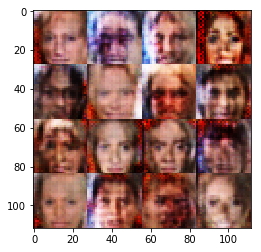

Epoch 1/1... Generator Loss: 1.6351 Discriminator Loss: 1.1856...
Epoch 1/1... Generator Loss: 0.5154 Discriminator Loss: 1.4371...
Epoch 1/1... Generator Loss: 0.9353 Discriminator Loss: 1.1391...
Epoch 1/1... Generator Loss: 1.1918 Discriminator Loss: 1.2472...
Epoch 1/1... Generator Loss: 1.0814 Discriminator Loss: 1.3061...
Epoch 1/1... Generator Loss: 0.5954 Discriminator Loss: 1.4726...
Epoch 1/1... Generator Loss: 0.6051 Discriminator Loss: 1.2987...
Epoch 1/1... Generator Loss: 0.7407 Discriminator Loss: 1.4137...
Epoch 1/1... Generator Loss: 0.5077 Discriminator Loss: 1.6822...
Epoch 1/1... Generator Loss: 0.6978 Discriminator Loss: 1.4841...


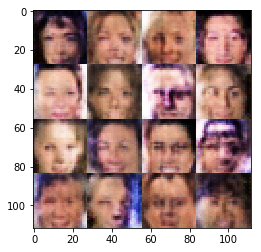

Epoch 1/1... Generator Loss: 0.5348 Discriminator Loss: 1.5552...
Epoch 1/1... Generator Loss: 0.7138 Discriminator Loss: 1.3243...
Epoch 1/1... Generator Loss: 0.5933 Discriminator Loss: 1.3760...
Epoch 1/1... Generator Loss: 0.6606 Discriminator Loss: 1.4020...
Epoch 1/1... Generator Loss: 0.8684 Discriminator Loss: 1.1840...
Epoch 1/1... Generator Loss: 1.0638 Discriminator Loss: 1.3956...
Epoch 1/1... Generator Loss: 1.0357 Discriminator Loss: 1.1979...
Epoch 1/1... Generator Loss: 0.9182 Discriminator Loss: 1.0808...
Epoch 1/1... Generator Loss: 0.8856 Discriminator Loss: 1.2026...
Epoch 1/1... Generator Loss: 0.7502 Discriminator Loss: 1.2518...


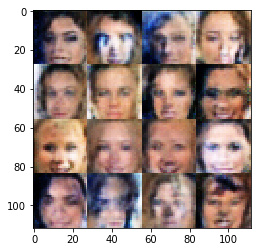

Epoch 1/1... Generator Loss: 0.6492 Discriminator Loss: 1.2770...
Epoch 1/1... Generator Loss: 0.9588 Discriminator Loss: 1.4075...
Epoch 1/1... Generator Loss: 0.8083 Discriminator Loss: 1.3893...
Epoch 1/1... Generator Loss: 0.6632 Discriminator Loss: 1.3285...
Epoch 1/1... Generator Loss: 1.0199 Discriminator Loss: 1.2202...
Epoch 1/1... Generator Loss: 0.6537 Discriminator Loss: 1.3785...
Epoch 1/1... Generator Loss: 0.8458 Discriminator Loss: 1.3962...
Epoch 1/1... Generator Loss: 0.6653 Discriminator Loss: 1.2388...
Epoch 1/1... Generator Loss: 0.6219 Discriminator Loss: 1.4633...
Epoch 1/1... Generator Loss: 0.8402 Discriminator Loss: 1.1964...


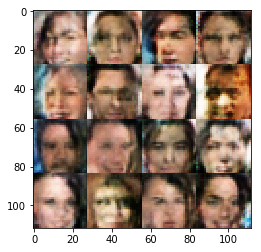

Epoch 1/1... Generator Loss: 0.5935 Discriminator Loss: 1.4704...
Epoch 1/1... Generator Loss: 0.5892 Discriminator Loss: 1.4477...
Epoch 1/1... Generator Loss: 0.9652 Discriminator Loss: 1.2264...
Epoch 1/1... Generator Loss: 0.7704 Discriminator Loss: 1.2413...
Epoch 1/1... Generator Loss: 0.8965 Discriminator Loss: 1.2754...
Epoch 1/1... Generator Loss: 0.6401 Discriminator Loss: 1.4054...
Epoch 1/1... Generator Loss: 0.6391 Discriminator Loss: 1.4583...
Epoch 1/1... Generator Loss: 0.8335 Discriminator Loss: 1.4686...
Epoch 1/1... Generator Loss: 0.5439 Discriminator Loss: 1.5358...
Epoch 1/1... Generator Loss: 0.8939 Discriminator Loss: 1.1793...


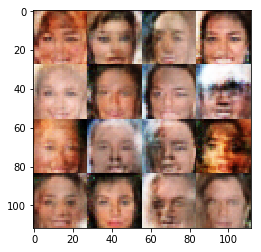

Epoch 1/1... Generator Loss: 0.6196 Discriminator Loss: 1.4192...
Epoch 1/1... Generator Loss: 0.9741 Discriminator Loss: 1.4915...
Epoch 1/1... Generator Loss: 0.7227 Discriminator Loss: 1.3061...
Epoch 1/1... Generator Loss: 1.0061 Discriminator Loss: 1.0752...
Epoch 1/1... Generator Loss: 0.8148 Discriminator Loss: 1.5042...
Epoch 1/1... Generator Loss: 1.2669 Discriminator Loss: 1.3831...
Epoch 1/1... Generator Loss: 0.8828 Discriminator Loss: 1.2931...
Epoch 1/1... Generator Loss: 1.2663 Discriminator Loss: 1.0241...
Epoch 1/1... Generator Loss: 0.9068 Discriminator Loss: 1.3002...
Epoch 1/1... Generator Loss: 0.7727 Discriminator Loss: 1.3221...


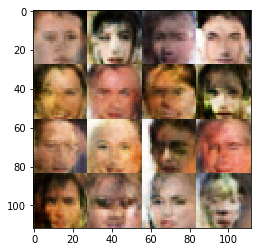

Epoch 1/1... Generator Loss: 0.6611 Discriminator Loss: 1.3651...
Epoch 1/1... Generator Loss: 0.5862 Discriminator Loss: 1.5360...
Epoch 1/1... Generator Loss: 0.8116 Discriminator Loss: 1.3940...
Epoch 1/1... Generator Loss: 0.5895 Discriminator Loss: 1.5029...
Epoch 1/1... Generator Loss: 1.0480 Discriminator Loss: 1.1144...
Epoch 1/1... Generator Loss: 0.9569 Discriminator Loss: 1.1860...
Epoch 1/1... Generator Loss: 0.7988 Discriminator Loss: 1.4020...
Epoch 1/1... Generator Loss: 0.5349 Discriminator Loss: 1.4774...
Epoch 1/1... Generator Loss: 0.7703 Discriminator Loss: 1.2299...
Epoch 1/1... Generator Loss: 0.7402 Discriminator Loss: 1.2776...


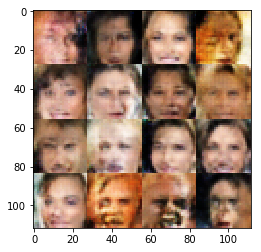

Epoch 1/1... Generator Loss: 0.7168 Discriminator Loss: 1.2909...
Epoch 1/1... Generator Loss: 0.6257 Discriminator Loss: 1.3067...
Epoch 1/1... Generator Loss: 0.7941 Discriminator Loss: 1.2215...
Epoch 1/1... Generator Loss: 0.6958 Discriminator Loss: 1.3510...
Epoch 1/1... Generator Loss: 0.6942 Discriminator Loss: 1.3220...
Epoch 1/1... Generator Loss: 0.7615 Discriminator Loss: 1.3014...
Epoch 1/1... Generator Loss: 0.8682 Discriminator Loss: 1.1950...
Epoch 1/1... Generator Loss: 0.5706 Discriminator Loss: 1.5618...
Epoch 1/1... Generator Loss: 0.6840 Discriminator Loss: 1.2515...
Epoch 1/1... Generator Loss: 1.0466 Discriminator Loss: 1.1334...


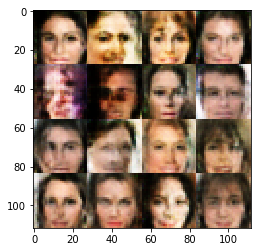

Epoch 1/1... Generator Loss: 0.6937 Discriminator Loss: 1.3043...
Epoch 1/1... Generator Loss: 0.9973 Discriminator Loss: 1.1695...
Epoch 1/1... Generator Loss: 0.8164 Discriminator Loss: 1.2888...
Epoch 1/1... Generator Loss: 0.6303 Discriminator Loss: 1.3549...
Epoch 1/1... Generator Loss: 0.6945 Discriminator Loss: 1.3271...
Epoch 1/1... Generator Loss: 1.0692 Discriminator Loss: 1.0413...
Epoch 1/1... Generator Loss: 0.8424 Discriminator Loss: 1.3382...
Epoch 1/1... Generator Loss: 0.9888 Discriminator Loss: 1.2025...
Epoch 1/1... Generator Loss: 0.4807 Discriminator Loss: 1.6572...
Epoch 1/1... Generator Loss: 0.7928 Discriminator Loss: 1.2082...


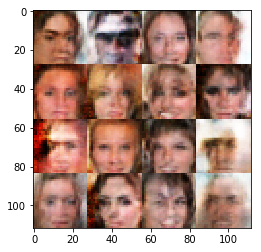

Epoch 1/1... Generator Loss: 0.8082 Discriminator Loss: 1.1944...
Epoch 1/1... Generator Loss: 0.8896 Discriminator Loss: 1.1903...
Epoch 1/1... Generator Loss: 0.8340 Discriminator Loss: 1.2105...
Epoch 1/1... Generator Loss: 0.6251 Discriminator Loss: 1.4512...
Epoch 1/1... Generator Loss: 0.7744 Discriminator Loss: 1.2482...
Epoch 1/1... Generator Loss: 0.6361 Discriminator Loss: 1.4849...
Epoch 1/1... Generator Loss: 0.7622 Discriminator Loss: 1.2532...
Epoch 1/1... Generator Loss: 0.6885 Discriminator Loss: 1.3526...
Epoch 1/1... Generator Loss: 0.7122 Discriminator Loss: 1.3995...
Epoch 1/1... Generator Loss: 0.9262 Discriminator Loss: 1.2795...


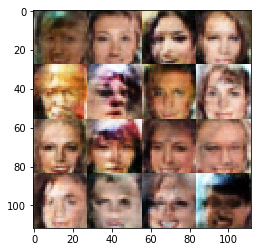

Epoch 1/1... Generator Loss: 0.7141 Discriminator Loss: 1.2270...
Epoch 1/1... Generator Loss: 0.6838 Discriminator Loss: 1.2755...
Epoch 1/1... Generator Loss: 0.6784 Discriminator Loss: 1.5920...
Epoch 1/1... Generator Loss: 0.9459 Discriminator Loss: 1.2684...
Epoch 1/1... Generator Loss: 0.6932 Discriminator Loss: 1.2812...
Epoch 1/1... Generator Loss: 0.8307 Discriminator Loss: 1.3077...
Epoch 1/1... Generator Loss: 1.0297 Discriminator Loss: 1.2718...
Epoch 1/1... Generator Loss: 0.6794 Discriminator Loss: 1.3605...
Epoch 1/1... Generator Loss: 0.8832 Discriminator Loss: 1.3676...
Epoch 1/1... Generator Loss: 0.6938 Discriminator Loss: 1.3148...


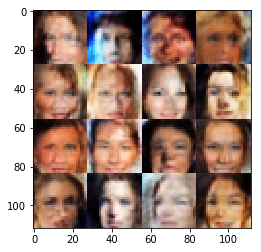

Epoch 1/1... Generator Loss: 0.9921 Discriminator Loss: 1.1355...
Epoch 1/1... Generator Loss: 0.8952 Discriminator Loss: 1.2293...
Epoch 1/1... Generator Loss: 0.8686 Discriminator Loss: 1.2917...
Epoch 1/1... Generator Loss: 0.7368 Discriminator Loss: 1.3027...
Epoch 1/1... Generator Loss: 0.5874 Discriminator Loss: 1.4035...
Epoch 1/1... Generator Loss: 0.8511 Discriminator Loss: 1.3342...
Epoch 1/1... Generator Loss: 0.7674 Discriminator Loss: 1.3882...
Epoch 1/1... Generator Loss: 0.8918 Discriminator Loss: 1.1845...
Epoch 1/1... Generator Loss: 0.6470 Discriminator Loss: 1.3642...
Epoch 1/1... Generator Loss: 0.7940 Discriminator Loss: 1.3189...


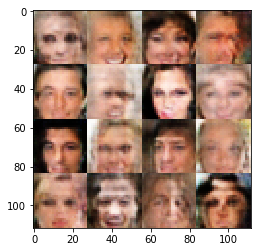

Epoch 1/1... Generator Loss: 0.8921 Discriminator Loss: 1.1607...
Epoch 1/1... Generator Loss: 0.8249 Discriminator Loss: 1.3923...
Epoch 1/1... Generator Loss: 0.7194 Discriminator Loss: 1.2631...
Epoch 1/1... Generator Loss: 0.8028 Discriminator Loss: 1.3629...
Epoch 1/1... Generator Loss: 0.6320 Discriminator Loss: 1.5442...
Epoch 1/1... Generator Loss: 0.6411 Discriminator Loss: 1.3030...
Epoch 1/1... Generator Loss: 0.9362 Discriminator Loss: 1.1723...
Epoch 1/1... Generator Loss: 0.7084 Discriminator Loss: 1.3666...
Epoch 1/1... Generator Loss: 0.7782 Discriminator Loss: 1.3502...
Epoch 1/1... Generator Loss: 0.8738 Discriminator Loss: 1.2827...


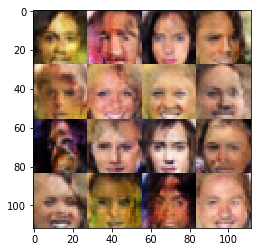

Epoch 1/1... Generator Loss: 0.9755 Discriminator Loss: 1.2658...
Epoch 1/1... Generator Loss: 0.7325 Discriminator Loss: 1.4056...
Epoch 1/1... Generator Loss: 0.8996 Discriminator Loss: 1.3091...
Epoch 1/1... Generator Loss: 0.8913 Discriminator Loss: 1.2879...
Epoch 1/1... Generator Loss: 0.7665 Discriminator Loss: 1.2045...
Epoch 1/1... Generator Loss: 0.5468 Discriminator Loss: 1.5244...
Epoch 1/1... Generator Loss: 1.0962 Discriminator Loss: 1.1350...
Epoch 1/1... Generator Loss: 0.8041 Discriminator Loss: 1.2992...
Epoch 1/1... Generator Loss: 0.6667 Discriminator Loss: 1.2607...
Epoch 1/1... Generator Loss: 0.7817 Discriminator Loss: 1.2292...


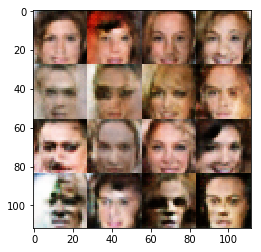

Epoch 1/1... Generator Loss: 0.9863 Discriminator Loss: 1.2621...
Epoch 1/1... Generator Loss: 0.7221 Discriminator Loss: 1.3197...
Epoch 1/1... Generator Loss: 0.6721 Discriminator Loss: 1.2272...
Epoch 1/1... Generator Loss: 0.6725 Discriminator Loss: 1.4129...
Epoch 1/1... Generator Loss: 0.8609 Discriminator Loss: 1.2048...
Epoch 1/1... Generator Loss: 0.7479 Discriminator Loss: 1.3813...
Epoch 1/1... Generator Loss: 0.9425 Discriminator Loss: 1.1747...
Epoch 1/1... Generator Loss: 0.9772 Discriminator Loss: 1.2822...
Epoch 1/1... Generator Loss: 0.9609 Discriminator Loss: 1.2134...
Epoch 1/1... Generator Loss: 0.7044 Discriminator Loss: 1.3694...


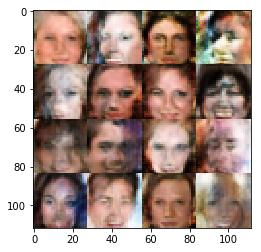

Epoch 1/1... Generator Loss: 0.8484 Discriminator Loss: 1.2913...
Epoch 1/1... Generator Loss: 0.8772 Discriminator Loss: 1.3846...
Epoch 1/1... Generator Loss: 0.7452 Discriminator Loss: 1.3087...
Epoch 1/1... Generator Loss: 0.7339 Discriminator Loss: 1.3556...
Epoch 1/1... Generator Loss: 0.7519 Discriminator Loss: 1.3050...
Epoch 1/1... Generator Loss: 0.6764 Discriminator Loss: 1.3335...
Epoch 1/1... Generator Loss: 0.7911 Discriminator Loss: 1.3161...
Epoch 1/1... Generator Loss: 1.0305 Discriminator Loss: 1.2124...
Epoch 1/1... Generator Loss: 0.7607 Discriminator Loss: 1.4460...
Epoch 1/1... Generator Loss: 0.7753 Discriminator Loss: 1.2371...


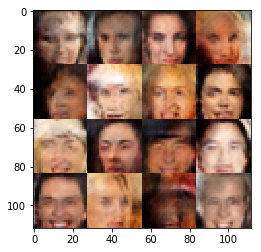

Epoch 1/1... Generator Loss: 0.6916 Discriminator Loss: 1.3945...
Epoch 1/1... Generator Loss: 0.8102 Discriminator Loss: 1.2588...
Epoch 1/1... Generator Loss: 0.8672 Discriminator Loss: 1.2159...
Epoch 1/1... Generator Loss: 0.8779 Discriminator Loss: 1.2324...
Epoch 1/1... Generator Loss: 0.6524 Discriminator Loss: 1.3786...
Epoch 1/1... Generator Loss: 0.9005 Discriminator Loss: 1.1720...
Epoch 1/1... Generator Loss: 0.7056 Discriminator Loss: 1.3606...
Epoch 1/1... Generator Loss: 0.8368 Discriminator Loss: 1.3021...
Epoch 1/1... Generator Loss: 0.8553 Discriminator Loss: 1.3471...
Epoch 1/1... Generator Loss: 1.0135 Discriminator Loss: 1.2579...


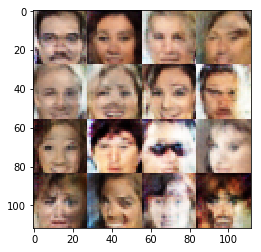

Epoch 1/1... Generator Loss: 0.6527 Discriminator Loss: 1.3607...
Epoch 1/1... Generator Loss: 1.0088 Discriminator Loss: 1.1666...
Epoch 1/1... Generator Loss: 0.6554 Discriminator Loss: 1.4160...
Epoch 1/1... Generator Loss: 0.6898 Discriminator Loss: 1.4499...
Epoch 1/1... Generator Loss: 0.7688 Discriminator Loss: 1.2610...
Epoch 1/1... Generator Loss: 0.7633 Discriminator Loss: 1.2261...
Epoch 1/1... Generator Loss: 0.6419 Discriminator Loss: 1.3040...
Epoch 1/1... Generator Loss: 0.7585 Discriminator Loss: 1.3264...
Epoch 1/1... Generator Loss: 0.7234 Discriminator Loss: 1.2886...
Epoch 1/1... Generator Loss: 0.5981 Discriminator Loss: 1.5834...


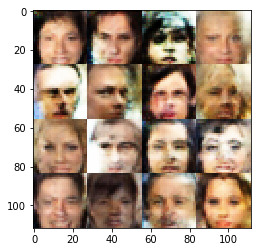

Epoch 1/1... Generator Loss: 0.6914 Discriminator Loss: 1.3553...
Epoch 1/1... Generator Loss: 0.6521 Discriminator Loss: 1.4004...
Epoch 1/1... Generator Loss: 0.6503 Discriminator Loss: 1.4023...
Epoch 1/1... Generator Loss: 0.7132 Discriminator Loss: 1.3785...
Epoch 1/1... Generator Loss: 0.6899 Discriminator Loss: 1.3710...
Epoch 1/1... Generator Loss: 0.6366 Discriminator Loss: 1.4361...
Epoch 1/1... Generator Loss: 0.9194 Discriminator Loss: 1.2333...
Epoch 1/1... Generator Loss: 0.7893 Discriminator Loss: 1.1688...
Epoch 1/1... Generator Loss: 0.6459 Discriminator Loss: 1.5727...
Epoch 1/1... Generator Loss: 0.9959 Discriminator Loss: 1.2287...


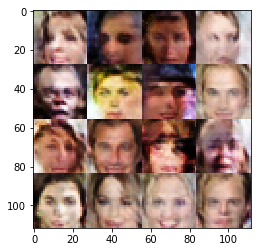

Epoch 1/1... Generator Loss: 0.5184 Discriminator Loss: 1.4945...
Epoch 1/1... Generator Loss: 0.8635 Discriminator Loss: 1.3085...
Epoch 1/1... Generator Loss: 0.7906 Discriminator Loss: 1.3318...
Epoch 1/1... Generator Loss: 0.5628 Discriminator Loss: 1.5311...
Epoch 1/1... Generator Loss: 0.8247 Discriminator Loss: 1.3578...
Epoch 1/1... Generator Loss: 0.8283 Discriminator Loss: 1.3552...
Epoch 1/1... Generator Loss: 0.7313 Discriminator Loss: 1.2855...
Epoch 1/1... Generator Loss: 0.9734 Discriminator Loss: 1.1675...
Epoch 1/1... Generator Loss: 0.8298 Discriminator Loss: 1.4243...
Epoch 1/1... Generator Loss: 0.6514 Discriminator Loss: 1.2927...


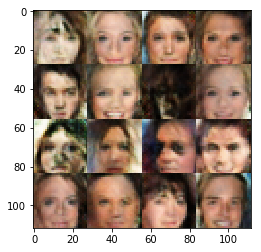

Epoch 1/1... Generator Loss: 0.7275 Discriminator Loss: 1.3362...
Epoch 1/1... Generator Loss: 0.7822 Discriminator Loss: 1.3747...
Epoch 1/1... Generator Loss: 0.7857 Discriminator Loss: 1.2904...
Epoch 1/1... Generator Loss: 0.8312 Discriminator Loss: 1.2672...
Epoch 1/1... Generator Loss: 1.1541 Discriminator Loss: 1.0827...
Epoch 1/1... Generator Loss: 0.9018 Discriminator Loss: 1.2589...
Epoch 1/1... Generator Loss: 0.8100 Discriminator Loss: 1.3260...
Epoch 1/1... Generator Loss: 0.9867 Discriminator Loss: 1.2283...
Epoch 1/1... Generator Loss: 0.5551 Discriminator Loss: 1.4723...
Epoch 1/1... Generator Loss: 0.7945 Discriminator Loss: 1.2555...


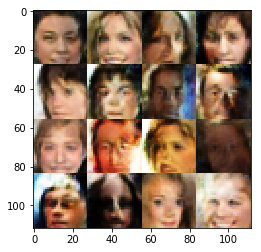

Epoch 1/1... Generator Loss: 0.6118 Discriminator Loss: 1.3926...
Epoch 1/1... Generator Loss: 0.5336 Discriminator Loss: 1.4865...
Epoch 1/1... Generator Loss: 0.8521 Discriminator Loss: 1.2932...
Epoch 1/1... Generator Loss: 1.0420 Discriminator Loss: 1.1536...
Epoch 1/1... Generator Loss: 0.6889 Discriminator Loss: 1.3666...
Epoch 1/1... Generator Loss: 0.7439 Discriminator Loss: 1.3164...
Epoch 1/1... Generator Loss: 0.7670 Discriminator Loss: 1.5040...
Epoch 1/1... Generator Loss: 0.7839 Discriminator Loss: 1.2930...
Epoch 1/1... Generator Loss: 0.6062 Discriminator Loss: 1.4461...
Epoch 1/1... Generator Loss: 0.7611 Discriminator Loss: 1.3258...


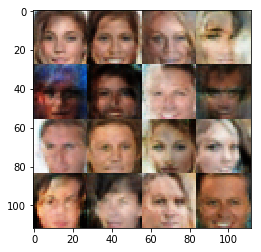

Epoch 1/1... Generator Loss: 0.9147 Discriminator Loss: 1.2587...
Epoch 1/1... Generator Loss: 0.7873 Discriminator Loss: 1.3431...
Epoch 1/1... Generator Loss: 0.7992 Discriminator Loss: 1.3079...
Epoch 1/1... Generator Loss: 0.8493 Discriminator Loss: 1.1882...
Epoch 1/1... Generator Loss: 0.7736 Discriminator Loss: 1.3135...
Epoch 1/1... Generator Loss: 0.6365 Discriminator Loss: 1.4715...
Epoch 1/1... Generator Loss: 0.8050 Discriminator Loss: 1.1516...
Epoch 1/1... Generator Loss: 0.6037 Discriminator Loss: 1.4827...
Epoch 1/1... Generator Loss: 0.7736 Discriminator Loss: 1.2906...
Epoch 1/1... Generator Loss: 0.8586 Discriminator Loss: 1.2577...


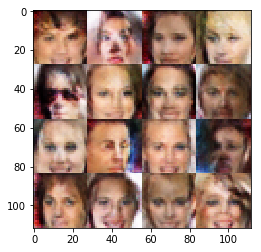

Epoch 1/1... Generator Loss: 0.7150 Discriminator Loss: 1.3703...
Epoch 1/1... Generator Loss: 0.9331 Discriminator Loss: 1.2705...
Epoch 1/1... Generator Loss: 0.7712 Discriminator Loss: 1.4062...
Epoch 1/1... Generator Loss: 0.7540 Discriminator Loss: 1.3803...
Epoch 1/1... Generator Loss: 0.5527 Discriminator Loss: 1.4339...
Epoch 1/1... Generator Loss: 0.9246 Discriminator Loss: 1.3509...
Epoch 1/1... Generator Loss: 0.6982 Discriminator Loss: 1.4398...
Epoch 1/1... Generator Loss: 0.8499 Discriminator Loss: 1.2845...
Epoch 1/1... Generator Loss: 0.8236 Discriminator Loss: 1.3016...
Epoch 1/1... Generator Loss: 0.8172 Discriminator Loss: 1.2653...


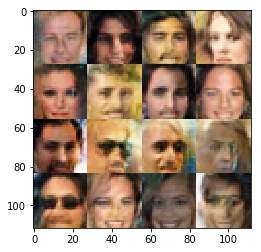

Epoch 1/1... Generator Loss: 0.5555 Discriminator Loss: 1.4660...
Epoch 1/1... Generator Loss: 0.7844 Discriminator Loss: 1.3131...
Epoch 1/1... Generator Loss: 0.7786 Discriminator Loss: 1.3965...
Epoch 1/1... Generator Loss: 0.8297 Discriminator Loss: 1.3504...
Epoch 1/1... Generator Loss: 0.8041 Discriminator Loss: 1.2662...
Epoch 1/1... Generator Loss: 0.7659 Discriminator Loss: 1.2466...
Epoch 1/1... Generator Loss: 0.9773 Discriminator Loss: 1.3021...
Epoch 1/1... Generator Loss: 0.7504 Discriminator Loss: 1.3919...
Epoch 1/1... Generator Loss: 0.7194 Discriminator Loss: 1.3586...
Epoch 1/1... Generator Loss: 0.7895 Discriminator Loss: 1.3517...


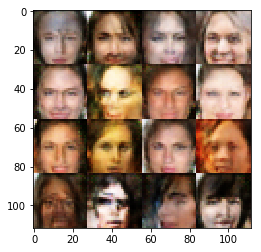

Epoch 1/1... Generator Loss: 0.8069 Discriminator Loss: 1.2801...
Epoch 1/1... Generator Loss: 0.7112 Discriminator Loss: 1.3351...
Epoch 1/1... Generator Loss: 0.6017 Discriminator Loss: 1.3957...
Epoch 1/1... Generator Loss: 0.8287 Discriminator Loss: 1.3343...
Epoch 1/1... Generator Loss: 0.7286 Discriminator Loss: 1.2481...
Epoch 1/1... Generator Loss: 0.7721 Discriminator Loss: 1.3083...
Epoch 1/1... Generator Loss: 0.7313 Discriminator Loss: 1.3536...
Epoch 1/1... Generator Loss: 0.7344 Discriminator Loss: 1.4930...
Epoch 1/1... Generator Loss: 0.8219 Discriminator Loss: 1.2847...
Epoch 1/1... Generator Loss: 0.6524 Discriminator Loss: 1.3394...


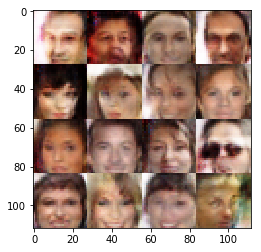

Epoch 1/1... Generator Loss: 0.7241 Discriminator Loss: 1.3013...
Epoch 1/1... Generator Loss: 0.6917 Discriminator Loss: 1.4827...
Epoch 1/1... Generator Loss: 0.7590 Discriminator Loss: 1.3334...
Epoch 1/1... Generator Loss: 0.7099 Discriminator Loss: 1.3271...
Epoch 1/1... Generator Loss: 0.8465 Discriminator Loss: 1.1874...
Epoch 1/1... Generator Loss: 0.9476 Discriminator Loss: 1.2779...
Epoch 1/1... Generator Loss: 0.9928 Discriminator Loss: 1.2559...
Epoch 1/1... Generator Loss: 0.8531 Discriminator Loss: 1.2998...
Epoch 1/1... Generator Loss: 0.7770 Discriminator Loss: 1.2144...
Epoch 1/1... Generator Loss: 0.8811 Discriminator Loss: 1.3469...


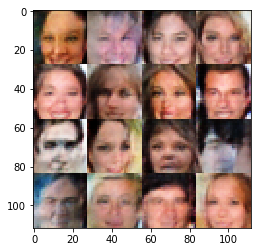

Epoch 1/1... Generator Loss: 0.7679 Discriminator Loss: 1.4030...
Epoch 1/1... Generator Loss: 1.0485 Discriminator Loss: 1.1715...
Epoch 1/1... Generator Loss: 0.8501 Discriminator Loss: 1.1839...
Epoch 1/1... Generator Loss: 0.7169 Discriminator Loss: 1.4469...
Epoch 1/1... Generator Loss: 0.7963 Discriminator Loss: 1.3080...
Epoch 1/1... Generator Loss: 0.7172 Discriminator Loss: 1.2929...
Epoch 1/1... Generator Loss: 0.8864 Discriminator Loss: 1.4026...
Epoch 1/1... Generator Loss: 0.6582 Discriminator Loss: 1.3189...
Epoch 1/1... Generator Loss: 0.7885 Discriminator Loss: 1.4161...
Epoch 1/1... Generator Loss: 0.9445 Discriminator Loss: 1.3125...


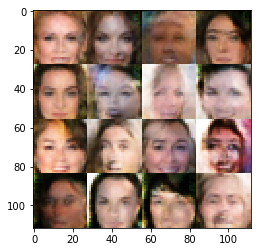

Epoch 1/1... Generator Loss: 0.8145 Discriminator Loss: 1.3065...
Epoch 1/1... Generator Loss: 0.7464 Discriminator Loss: 1.2367...
Epoch 1/1... Generator Loss: 0.8878 Discriminator Loss: 1.2915...
Epoch 1/1... Generator Loss: 0.7094 Discriminator Loss: 1.3932...
Epoch 1/1... Generator Loss: 0.7704 Discriminator Loss: 1.3556...
Epoch 1/1... Generator Loss: 0.8214 Discriminator Loss: 1.1869...
Epoch 1/1... Generator Loss: 0.7795 Discriminator Loss: 1.5072...
Epoch 1/1... Generator Loss: 0.5750 Discriminator Loss: 1.4915...
Epoch 1/1... Generator Loss: 0.7510 Discriminator Loss: 1.2965...
Epoch 1/1... Generator Loss: 0.7377 Discriminator Loss: 1.4514...


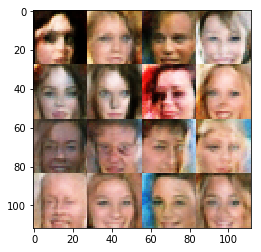

Epoch 1/1... Generator Loss: 0.6249 Discriminator Loss: 1.5117...
Epoch 1/1... Generator Loss: 0.7525 Discriminator Loss: 1.3645...
Epoch 1/1... Generator Loss: 0.7795 Discriminator Loss: 1.3723...
Epoch 1/1... Generator Loss: 0.8948 Discriminator Loss: 1.3106...
Epoch 1/1... Generator Loss: 0.7666 Discriminator Loss: 1.4137...
Epoch 1/1... Generator Loss: 0.9157 Discriminator Loss: 1.1464...
Epoch 1/1... Generator Loss: 0.9280 Discriminator Loss: 1.2704...
Epoch 1/1... Generator Loss: 0.7863 Discriminator Loss: 1.2477...
Epoch 1/1... Generator Loss: 0.6890 Discriminator Loss: 1.4261...
Epoch 1/1... Generator Loss: 0.8436 Discriminator Loss: 1.3466...


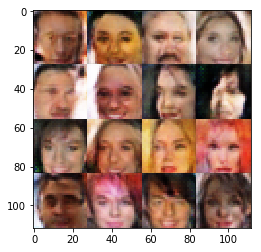

Epoch 1/1... Generator Loss: 0.6508 Discriminator Loss: 1.3468...
Epoch 1/1... Generator Loss: 0.7767 Discriminator Loss: 1.4273...
Epoch 1/1... Generator Loss: 0.8001 Discriminator Loss: 1.2538...
Epoch 1/1... Generator Loss: 0.7925 Discriminator Loss: 1.3791...
Epoch 1/1... Generator Loss: 0.8532 Discriminator Loss: 1.2406...
Epoch 1/1... Generator Loss: 0.6975 Discriminator Loss: 1.4088...
Epoch 1/1... Generator Loss: 0.7711 Discriminator Loss: 1.3756...
Epoch 1/1... Generator Loss: 0.8606 Discriminator Loss: 1.3373...
Epoch 1/1... Generator Loss: 0.8473 Discriminator Loss: 1.2884...
Epoch 1/1... Generator Loss: 0.8568 Discriminator Loss: 1.3351...


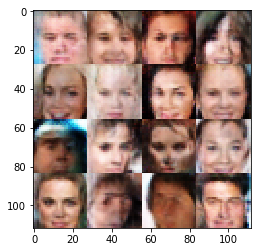

Epoch 1/1... Generator Loss: 0.8752 Discriminator Loss: 1.2444...
Epoch 1/1... Generator Loss: 0.8925 Discriminator Loss: 1.2754...
Epoch 1/1... Generator Loss: 0.6983 Discriminator Loss: 1.3440...
Epoch 1/1... Generator Loss: 0.7723 Discriminator Loss: 1.3309...
Epoch 1/1... Generator Loss: 0.7734 Discriminator Loss: 1.4330...
Epoch 1/1... Generator Loss: 0.9664 Discriminator Loss: 1.3488...
Epoch 1/1... Generator Loss: 0.6610 Discriminator Loss: 1.4450...
Epoch 1/1... Generator Loss: 0.6148 Discriminator Loss: 1.4800...
Epoch 1/1... Generator Loss: 0.8234 Discriminator Loss: 1.2964...
Epoch 1/1... Generator Loss: 0.6587 Discriminator Loss: 1.3471...


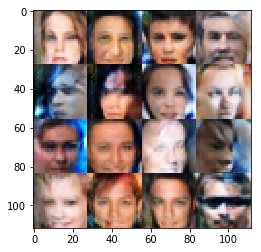

Epoch 1/1... Generator Loss: 0.7243 Discriminator Loss: 1.3116...
Epoch 1/1... Generator Loss: 0.8288 Discriminator Loss: 1.2737...
Epoch 1/1... Generator Loss: 0.8267 Discriminator Loss: 1.3930...
Epoch 1/1... Generator Loss: 0.9114 Discriminator Loss: 1.3306...
Epoch 1/1... Generator Loss: 0.9797 Discriminator Loss: 1.1598...
Epoch 1/1... Generator Loss: 0.7746 Discriminator Loss: 1.3182...
Epoch 1/1... Generator Loss: 0.7717 Discriminator Loss: 1.3079...
Epoch 1/1... Generator Loss: 0.9913 Discriminator Loss: 1.1851...
Epoch 1/1... Generator Loss: 0.6911 Discriminator Loss: 1.3873...
Epoch 1/1... Generator Loss: 0.5715 Discriminator Loss: 1.4834...


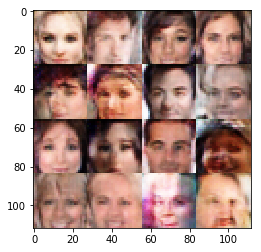

Epoch 1/1... Generator Loss: 0.8133 Discriminator Loss: 1.3085...
Epoch 1/1... Generator Loss: 0.6274 Discriminator Loss: 1.3815...
Epoch 1/1... Generator Loss: 0.8417 Discriminator Loss: 1.3602...
Epoch 1/1... Generator Loss: 0.8748 Discriminator Loss: 1.2037...
Epoch 1/1... Generator Loss: 0.9102 Discriminator Loss: 1.2792...
Epoch 1/1... Generator Loss: 0.6783 Discriminator Loss: 1.4364...
Epoch 1/1... Generator Loss: 0.8958 Discriminator Loss: 1.3167...
Epoch 1/1... Generator Loss: 0.7867 Discriminator Loss: 1.2762...
Epoch 1/1... Generator Loss: 0.6945 Discriminator Loss: 1.3990...
Epoch 1/1... Generator Loss: 0.7576 Discriminator Loss: 1.3300...


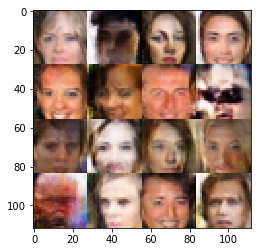

Epoch 1/1... Generator Loss: 0.6767 Discriminator Loss: 1.5295...
Epoch 1/1... Generator Loss: 0.7897 Discriminator Loss: 1.3220...
Epoch 1/1... Generator Loss: 0.7225 Discriminator Loss: 1.3205...
Epoch 1/1... Generator Loss: 0.6580 Discriminator Loss: 1.3028...
Epoch 1/1... Generator Loss: 0.7458 Discriminator Loss: 1.3197...
Epoch 1/1... Generator Loss: 0.7376 Discriminator Loss: 1.4009...
Epoch 1/1... Generator Loss: 0.6953 Discriminator Loss: 1.3119...
Epoch 1/1... Generator Loss: 0.8659 Discriminator Loss: 1.3242...
Epoch 1/1... Generator Loss: 0.6210 Discriminator Loss: 1.5373...
Epoch 1/1... Generator Loss: 0.7656 Discriminator Loss: 1.3464...


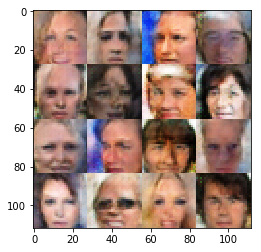

Epoch 1/1... Generator Loss: 0.8169 Discriminator Loss: 1.3048...
Epoch 1/1... Generator Loss: 0.7492 Discriminator Loss: 1.3708...
Epoch 1/1... Generator Loss: 0.6480 Discriminator Loss: 1.4356...
Epoch 1/1... Generator Loss: 0.5494 Discriminator Loss: 1.5370...
Epoch 1/1... Generator Loss: 0.7406 Discriminator Loss: 1.3277...
Epoch 1/1... Generator Loss: 0.6608 Discriminator Loss: 1.4302...
Epoch 1/1... Generator Loss: 0.9622 Discriminator Loss: 1.0859...
Epoch 1/1... Generator Loss: 0.9465 Discriminator Loss: 1.2435...
Epoch 1/1... Generator Loss: 0.6041 Discriminator Loss: 1.4521...
Epoch 1/1... Generator Loss: 0.6863 Discriminator Loss: 1.4729...


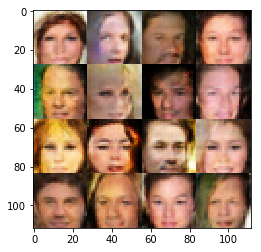

Epoch 1/1... Generator Loss: 0.8063 Discriminator Loss: 1.3048...
Epoch 1/1... Generator Loss: 0.6773 Discriminator Loss: 1.4334...
Epoch 1/1... Generator Loss: 0.7153 Discriminator Loss: 1.3606...
Epoch 1/1... Generator Loss: 0.7824 Discriminator Loss: 1.3647...
Epoch 1/1... Generator Loss: 1.0045 Discriminator Loss: 1.3659...
Epoch 1/1... Generator Loss: 0.6939 Discriminator Loss: 1.3839...
Epoch 1/1... Generator Loss: 0.8501 Discriminator Loss: 1.3198...
Epoch 1/1... Generator Loss: 0.6949 Discriminator Loss: 1.4049...
Epoch 1/1... Generator Loss: 0.5920 Discriminator Loss: 1.3614...
Epoch 1/1... Generator Loss: 0.7455 Discriminator Loss: 1.3751...


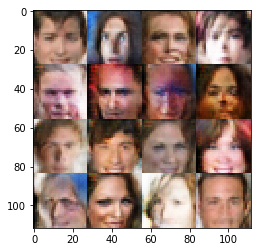

Epoch 1/1... Generator Loss: 0.8600 Discriminator Loss: 1.1728...
Epoch 1/1... Generator Loss: 0.8700 Discriminator Loss: 1.3185...
Epoch 1/1... Generator Loss: 0.8307 Discriminator Loss: 1.2853...
Epoch 1/1... Generator Loss: 0.8005 Discriminator Loss: 1.3057...
Epoch 1/1... Generator Loss: 0.8378 Discriminator Loss: 1.3482...
Epoch 1/1... Generator Loss: 0.8103 Discriminator Loss: 1.3335...
Epoch 1/1... Generator Loss: 0.9020 Discriminator Loss: 1.2207...
Epoch 1/1... Generator Loss: 0.7822 Discriminator Loss: 1.3117...
Epoch 1/1... Generator Loss: 0.6507 Discriminator Loss: 1.4684...
Epoch 1/1... Generator Loss: 0.7175 Discriminator Loss: 1.3209...


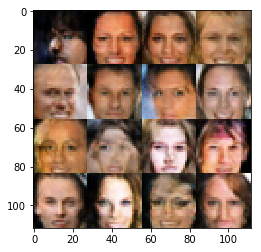

Epoch 1/1... Generator Loss: 0.8518 Discriminator Loss: 1.3410...
Epoch 1/1... Generator Loss: 0.8240 Discriminator Loss: 1.2983...
Epoch 1/1... Generator Loss: 0.7356 Discriminator Loss: 1.3448...
Epoch 1/1... Generator Loss: 0.6199 Discriminator Loss: 1.4100...
Epoch 1/1... Generator Loss: 0.8860 Discriminator Loss: 1.2857...
Epoch 1/1... Generator Loss: 0.7147 Discriminator Loss: 1.3601...
Epoch 1/1... Generator Loss: 0.5796 Discriminator Loss: 1.4571...
Epoch 1/1... Generator Loss: 0.9723 Discriminator Loss: 1.1973...
Epoch 1/1... Generator Loss: 0.7903 Discriminator Loss: 1.2876...
Epoch 1/1... Generator Loss: 0.6487 Discriminator Loss: 1.4927...


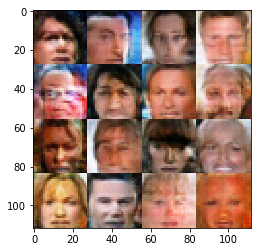

Epoch 1/1... Generator Loss: 0.8538 Discriminator Loss: 1.3395...
Epoch 1/1... Generator Loss: 0.6396 Discriminator Loss: 1.4146...
Epoch 1/1... Generator Loss: 0.9152 Discriminator Loss: 1.1846...
Epoch 1/1... Generator Loss: 0.7276 Discriminator Loss: 1.4311...
Epoch 1/1... Generator Loss: 0.6488 Discriminator Loss: 1.3669...
Epoch 1/1... Generator Loss: 0.7321 Discriminator Loss: 1.4242...
Epoch 1/1... Generator Loss: 0.8349 Discriminator Loss: 1.2398...
Epoch 1/1... Generator Loss: 0.8134 Discriminator Loss: 1.3566...
Epoch 1/1... Generator Loss: 0.7159 Discriminator Loss: 1.4583...
Epoch 1/1... Generator Loss: 0.7584 Discriminator Loss: 1.3748...


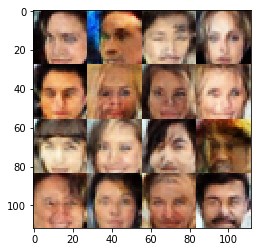

Epoch 1/1... Generator Loss: 0.7453 Discriminator Loss: 1.4176...
Epoch 1/1... Generator Loss: 0.7224 Discriminator Loss: 1.3942...
Epoch 1/1... Generator Loss: 0.6541 Discriminator Loss: 1.4679...
Epoch 1/1... Generator Loss: 0.9488 Discriminator Loss: 1.2757...
Epoch 1/1... Generator Loss: 0.8678 Discriminator Loss: 1.2972...
Epoch 1/1... Generator Loss: 0.8190 Discriminator Loss: 1.2256...
Epoch 1/1... Generator Loss: 0.6759 Discriminator Loss: 1.3775...
Epoch 1/1... Generator Loss: 0.7944 Discriminator Loss: 1.2608...
Epoch 1/1... Generator Loss: 0.6988 Discriminator Loss: 1.4877...
Epoch 1/1... Generator Loss: 0.7814 Discriminator Loss: 1.3767...


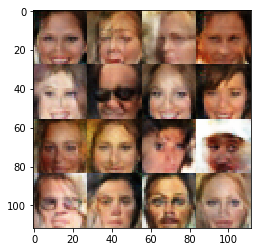

Epoch 1/1... Generator Loss: 0.7381 Discriminator Loss: 1.4613...
Epoch 1/1... Generator Loss: 0.7417 Discriminator Loss: 1.3559...
Epoch 1/1... Generator Loss: 0.6554 Discriminator Loss: 1.4751...
Epoch 1/1... Generator Loss: 0.8116 Discriminator Loss: 1.2604...
Epoch 1/1... Generator Loss: 0.7193 Discriminator Loss: 1.3763...
Epoch 1/1... Generator Loss: 0.9755 Discriminator Loss: 1.1247...
Epoch 1/1... Generator Loss: 0.9197 Discriminator Loss: 1.2033...
Epoch 1/1... Generator Loss: 0.7432 Discriminator Loss: 1.3808...
Epoch 1/1... Generator Loss: 0.7027 Discriminator Loss: 1.3293...
Epoch 1/1... Generator Loss: 0.7584 Discriminator Loss: 1.3432...


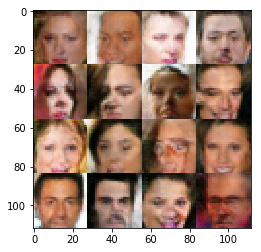

Epoch 1/1... Generator Loss: 0.7752 Discriminator Loss: 1.3076...
Epoch 1/1... Generator Loss: 0.8010 Discriminator Loss: 1.3434...
Epoch 1/1... Generator Loss: 0.6349 Discriminator Loss: 1.3770...
Epoch 1/1... Generator Loss: 0.7587 Discriminator Loss: 1.2839...
Epoch 1/1... Generator Loss: 0.8303 Discriminator Loss: 1.2705...
Epoch 1/1... Generator Loss: 0.8199 Discriminator Loss: 1.2819...
Epoch 1/1... Generator Loss: 0.7446 Discriminator Loss: 1.3531...
Epoch 1/1... Generator Loss: 0.8274 Discriminator Loss: 1.3512...
Epoch 1/1... Generator Loss: 0.5883 Discriminator Loss: 1.5921...
Epoch 1/1... Generator Loss: 1.0100 Discriminator Loss: 1.3493...


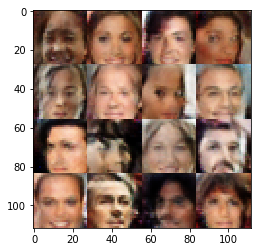

Epoch 1/1... Generator Loss: 0.7459 Discriminator Loss: 1.3913...
Epoch 1/1... Generator Loss: 0.7831 Discriminator Loss: 1.2244...
Epoch 1/1... Generator Loss: 0.7205 Discriminator Loss: 1.4300...
Epoch 1/1... Generator Loss: 0.7602 Discriminator Loss: 1.2814...
Epoch 1/1... Generator Loss: 0.8316 Discriminator Loss: 1.2792...
Epoch 1/1... Generator Loss: 0.7861 Discriminator Loss: 1.3064...
Epoch 1/1... Generator Loss: 0.7527 Discriminator Loss: 1.2855...
Epoch 1/1... Generator Loss: 0.6503 Discriminator Loss: 1.3626...
Epoch 1/1... Generator Loss: 0.6808 Discriminator Loss: 1.3703...
Epoch 1/1... Generator Loss: 0.7713 Discriminator Loss: 1.2671...


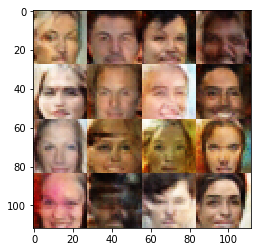

Epoch 1/1... Generator Loss: 0.8499 Discriminator Loss: 1.2730...
Epoch 1/1... Generator Loss: 0.7820 Discriminator Loss: 1.2662...
Epoch 1/1... Generator Loss: 0.9086 Discriminator Loss: 1.3144...
Epoch 1/1... Generator Loss: 0.7004 Discriminator Loss: 1.4625...
Epoch 1/1... Generator Loss: 0.7056 Discriminator Loss: 1.3300...
Epoch 1/1... Generator Loss: 0.7623 Discriminator Loss: 1.2636...
Epoch 1/1... Generator Loss: 0.8047 Discriminator Loss: 1.2256...
Epoch 1/1... Generator Loss: 0.6381 Discriminator Loss: 1.5006...
Epoch 1/1... Generator Loss: 0.7502 Discriminator Loss: 1.2737...
Epoch 1/1... Generator Loss: 0.6498 Discriminator Loss: 1.3249...


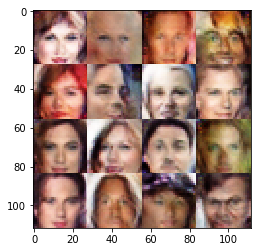

Epoch 1/1... Generator Loss: 0.5909 Discriminator Loss: 1.4114...
Epoch 1/1... Generator Loss: 0.8316 Discriminator Loss: 1.4240...
Epoch 1/1... Generator Loss: 0.7208 Discriminator Loss: 1.3635...
Epoch 1/1... Generator Loss: 0.8354 Discriminator Loss: 1.4491...
Epoch 1/1... Generator Loss: 0.6772 Discriminator Loss: 1.2975...
Epoch 1/1... Generator Loss: 0.8594 Discriminator Loss: 1.3073...
Epoch 1/1... Generator Loss: 0.7921 Discriminator Loss: 1.3292...
Epoch 1/1... Generator Loss: 0.6995 Discriminator Loss: 1.3149...
Epoch 1/1... Generator Loss: 0.6706 Discriminator Loss: 1.4163...
Epoch 1/1... Generator Loss: 0.7231 Discriminator Loss: 1.2966...


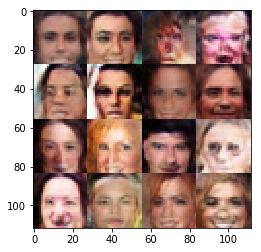

Epoch 1/1... Generator Loss: 0.7904 Discriminator Loss: 1.2355...
Epoch 1/1... Generator Loss: 0.7250 Discriminator Loss: 1.3059...
Epoch 1/1... Generator Loss: 0.6395 Discriminator Loss: 1.4950...
Epoch 1/1... Generator Loss: 0.7681 Discriminator Loss: 1.3003...
Epoch 1/1... Generator Loss: 0.8567 Discriminator Loss: 1.2528...
Epoch 1/1... Generator Loss: 0.7629 Discriminator Loss: 1.3368...
Epoch 1/1... Generator Loss: 0.6954 Discriminator Loss: 1.3355...
Epoch 1/1... Generator Loss: 0.7680 Discriminator Loss: 1.4177...
Epoch 1/1... Generator Loss: 0.7442 Discriminator Loss: 1.4012...
Epoch 1/1... Generator Loss: 0.7913 Discriminator Loss: 1.2754...


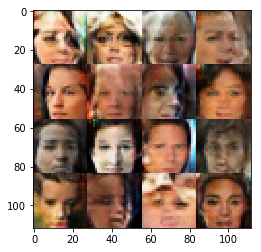

Epoch 1/1... Generator Loss: 0.8044 Discriminator Loss: 1.4077...
Epoch 1/1... Generator Loss: 0.7540 Discriminator Loss: 1.3440...
Epoch 1/1... Generator Loss: 0.5508 Discriminator Loss: 1.6775...
Epoch 1/1... Generator Loss: 0.8055 Discriminator Loss: 1.3003...
Epoch 1/1... Generator Loss: 0.7117 Discriminator Loss: 1.4307...
Epoch 1/1... Generator Loss: 0.7946 Discriminator Loss: 1.2871...
Epoch 1/1... Generator Loss: 0.7592 Discriminator Loss: 1.3508...
Epoch 1/1... Generator Loss: 0.7329 Discriminator Loss: 1.4361...
Epoch 1/1... Generator Loss: 0.7784 Discriminator Loss: 1.3547...
Epoch 1/1... Generator Loss: 0.6052 Discriminator Loss: 1.4419...


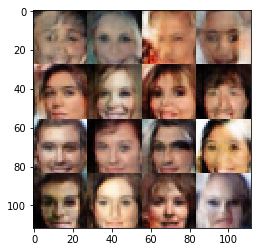

Epoch 1/1... Generator Loss: 0.7273 Discriminator Loss: 1.3876...
Epoch 1/1... Generator Loss: 0.6865 Discriminator Loss: 1.4190...
Epoch 1/1... Generator Loss: 0.7948 Discriminator Loss: 1.2681...
Epoch 1/1... Generator Loss: 0.8004 Discriminator Loss: 1.2838...
Epoch 1/1... Generator Loss: 0.8085 Discriminator Loss: 1.3511...
Epoch 1/1... Generator Loss: 0.7146 Discriminator Loss: 1.4387...
Epoch 1/1... Generator Loss: 0.7101 Discriminator Loss: 1.3180...
Epoch 1/1... Generator Loss: 0.7433 Discriminator Loss: 1.2929...
Epoch 1/1... Generator Loss: 0.6845 Discriminator Loss: 1.4529...
Epoch 1/1... Generator Loss: 0.9542 Discriminator Loss: 1.1543...


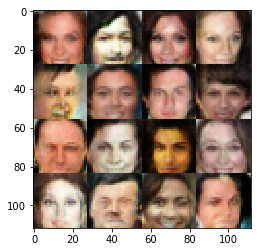

Epoch 1/1... Generator Loss: 0.7119 Discriminator Loss: 1.3776...
Epoch 1/1... Generator Loss: 0.8434 Discriminator Loss: 1.3074...
Epoch 1/1... Generator Loss: 0.8741 Discriminator Loss: 1.3327...
Epoch 1/1... Generator Loss: 0.5493 Discriminator Loss: 1.4914...
Epoch 1/1... Generator Loss: 0.6636 Discriminator Loss: 1.5326...
Epoch 1/1... Generator Loss: 0.7962 Discriminator Loss: 1.3920...
Epoch 1/1... Generator Loss: 0.9108 Discriminator Loss: 1.4831...
Epoch 1/1... Generator Loss: 0.7298 Discriminator Loss: 1.3708...
Epoch 1/1... Generator Loss: 0.5620 Discriminator Loss: 1.5547...
Epoch 1/1... Generator Loss: 0.7056 Discriminator Loss: 1.4251...


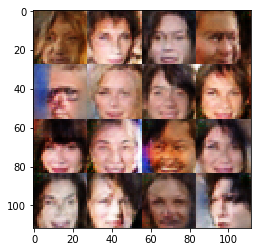

Epoch 1/1... Generator Loss: 0.8076 Discriminator Loss: 1.3013...
Epoch 1/1... Generator Loss: 0.7156 Discriminator Loss: 1.3656...
Epoch 1/1... Generator Loss: 0.6927 Discriminator Loss: 1.4476...
Epoch 1/1... Generator Loss: 0.5581 Discriminator Loss: 1.5786...
Epoch 1/1... Generator Loss: 0.7724 Discriminator Loss: 1.3542...
Epoch 1/1... Generator Loss: 0.8143 Discriminator Loss: 1.3547...
Epoch 1/1... Generator Loss: 0.7448 Discriminator Loss: 1.5124...
Epoch 1/1... Generator Loss: 0.7834 Discriminator Loss: 1.2852...
Epoch 1/1... Generator Loss: 0.8173 Discriminator Loss: 1.2925...
Epoch 1/1... Generator Loss: 0.8625 Discriminator Loss: 1.2542...


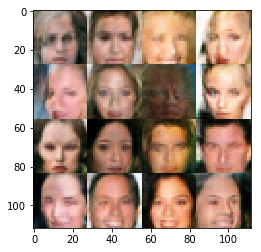

Epoch 1/1... Generator Loss: 0.7277 Discriminator Loss: 1.3687...
Epoch 1/1... Generator Loss: 0.7436 Discriminator Loss: 1.3774...
Epoch 1/1... Generator Loss: 0.7630 Discriminator Loss: 1.3777...
Epoch 1/1... Generator Loss: 0.8183 Discriminator Loss: 1.3827...
Epoch 1/1... Generator Loss: 0.9309 Discriminator Loss: 1.1313...
Epoch 1/1... Generator Loss: 0.8385 Discriminator Loss: 1.3266...
Epoch 1/1... Generator Loss: 0.8949 Discriminator Loss: 1.3157...
Epoch 1/1... Generator Loss: 0.7597 Discriminator Loss: 1.4694...
Epoch 1/1... Generator Loss: 0.7857 Discriminator Loss: 1.2629...
Epoch 1/1... Generator Loss: 0.6516 Discriminator Loss: 1.4686...


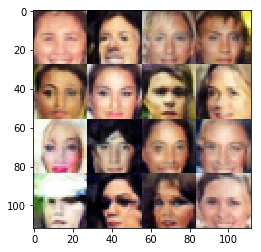

Epoch 1/1... Generator Loss: 0.8310 Discriminator Loss: 1.3358...
Epoch 1/1... Generator Loss: 0.8494 Discriminator Loss: 1.3583...
Epoch 1/1... Generator Loss: 0.7540 Discriminator Loss: 1.4204...
Epoch 1/1... Generator Loss: 0.7826 Discriminator Loss: 1.2812...
Epoch 1/1... Generator Loss: 0.7035 Discriminator Loss: 1.3965...
Epoch 1/1... Generator Loss: 0.8158 Discriminator Loss: 1.3420...
Epoch 1/1... Generator Loss: 0.7715 Discriminator Loss: 1.2565...
Epoch 1/1... Generator Loss: 0.8290 Discriminator Loss: 1.2351...
Epoch 1/1... Generator Loss: 0.7448 Discriminator Loss: 1.3267...
Epoch 1/1... Generator Loss: 0.7270 Discriminator Loss: 1.4755...


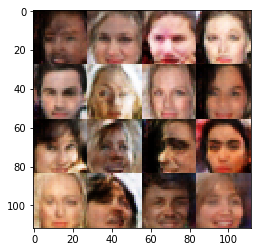

Epoch 1/1... Generator Loss: 0.9250 Discriminator Loss: 1.1620...
Epoch 1/1... Generator Loss: 0.7260 Discriminator Loss: 1.2754...
Epoch 1/1... Generator Loss: 0.8978 Discriminator Loss: 1.3255...


In [14]:
batch_size = 32
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.